#Parte 1

##Medida resumo

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
file_path = 'Base_ScoreCredito_QuantumFinance.csv'
data = pd.read_csv(file_path, sep=';', encoding='utf-8')

In [ ]:
#Verificação inicial do dataset
data.head()

id  idade sexo estado_civil         escola  Qte_dependentes  \
0  708082083     45    F       casado      graduacao                3   
1  708083283     58    M     solteiro  ensino fundam                0   
2  708084558     46    M   divorciado      doutorado                3   
3  708085458     34    F     solteiro       mestrado                0   
4  708086958     49    F       casado       mestrado                2   

   tempo_ultimoservico  trabalha    vl_salario_mil  reg_moradia  casa_propria  \
0                   40         1   40,089665024322            3             0   
1                   44         1   66,557645274838            3             0   
2                   35         1   123,68182089138            6             0   
3                   22         1  19,7159343168329            6             0   
4                   36         0                 0            3             1   

   vl_imovel_em_mil  Qte_cartoes  Qte_carros SCORE_CREDITO  
0                 0            1           1           778  
1                 0            1           0         276,3  
2                 0            1           1           401  
3                 0            1           0         347,4  
4               437            1           2           476

In [ ]:
#Removendo coluna ID:
data.drop(columns=['id'], inplace=True)

In [ ]:
#Trocando ',' por '.':
data['vl_salario_mil'] = pd.to_numeric(data['vl_salario_mil'].str.replace(',', '.'), errors='coerce')
data['SCORE_CREDITO'] = pd.to_numeric(data['SCORE_CREDITO'].str.replace(',', '.'), errors='coerce')

In [ ]:
#Separação de variáveis por tipo:
var_quant = ['idade', 'Qte_dependentes', 'tempo_ultimoservico', 'vl_salario_mil', 'vl_imovel_em_mil', 'Qte_cartoes', 'Qte_carros']
var_qual = ['sexo', 'estado_civil', 'escola', 'trabalha', 'reg_moradia', 'casa_propria']
var_target = ['SCORE_CREDITO']

In [ ]:
#Tipagem:
var_quant_int = ['Qte_dependentes', 'Qte_cartoes', 'Qte_carros']
var_quant_float = ['idade', 'vl_salario_mil', 'tempo_ultimoservico', 'vl_imovel_em_mil']

for i in data.columns:
  if i in var_quant_int:
    data[i] = data[i].astype(int)
  elif i in var_quant_float:
    data[i] = data[i].astype(float)
  elif i in var_target:
    data[i] = data[i].astype(float)
  else:
    data[i] = data[i].astype(str)

In [ ]:
#Medidas resumo:
data.describe()

idade  Qte_dependentes  tempo_ultimoservico  vl_salario_mil  \
count  10127.000000     10127.000000         10127.000000    10127.000000   
mean      46.325960         1.547447            34.133208       70.209002   
std        8.016814         1.489079             8.221428       55.567032   
min       26.000000         0.000000             7.000000        0.000000   
25%       41.000000         0.000000            30.000000       21.330536   
50%       46.000000         1.000000            34.000000       66.486331   
75%       52.000000         3.000000            39.000000      107.544225   
max       73.000000         5.000000            57.000000      233.301793   

       vl_imovel_em_mil   Qte_cartoes    Qte_carros  SCORE_CREDITO  
count      10127.000000  10127.000000  10127.000000   10127.000000  
mean         208.999111      1.083638      0.623383     469.500364  
std          378.495229      0.333784      0.569796     133.814653  
min            0.000000      1.000000      0.000000     162.000000  
25%            0.000000      1.000000      0.000000     375.000000  
50%            0.000000      1.000000      1.000000     449.600000  
75%          289.000000      1.000000      1.000000     540.900000  
max         1800.000000      4.000000      2.000000     979.650000

In [ ]:
#Verificação de informações sobre dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   idade                10127 non-null  float64
 1   sexo                 10127 non-null  object 
 2   estado_civil         10127 non-null  object 
 3   escola               10127 non-null  object 
 4   Qte_dependentes      10127 non-null  int64  
 5   tempo_ultimoservico  10127 non-null  float64
 6   trabalha             10127 non-null  object 
 7   vl_salario_mil       10127 non-null  float64
 8   reg_moradia          10127 non-null  object 
 9   casa_propria         10127 non-null  object 
 10  vl_imovel_em_mil     10127 non-null  float64
 11  Qte_cartoes          10127 non-null  int64  
 12  Qte_carros           10127 non-null  int64  
 13  SCORE_CREDITO        10127 non-null  float64
dtypes: float64(5), int64(3), object(6)
memory usage: 1.1+ MB


##Histogramas

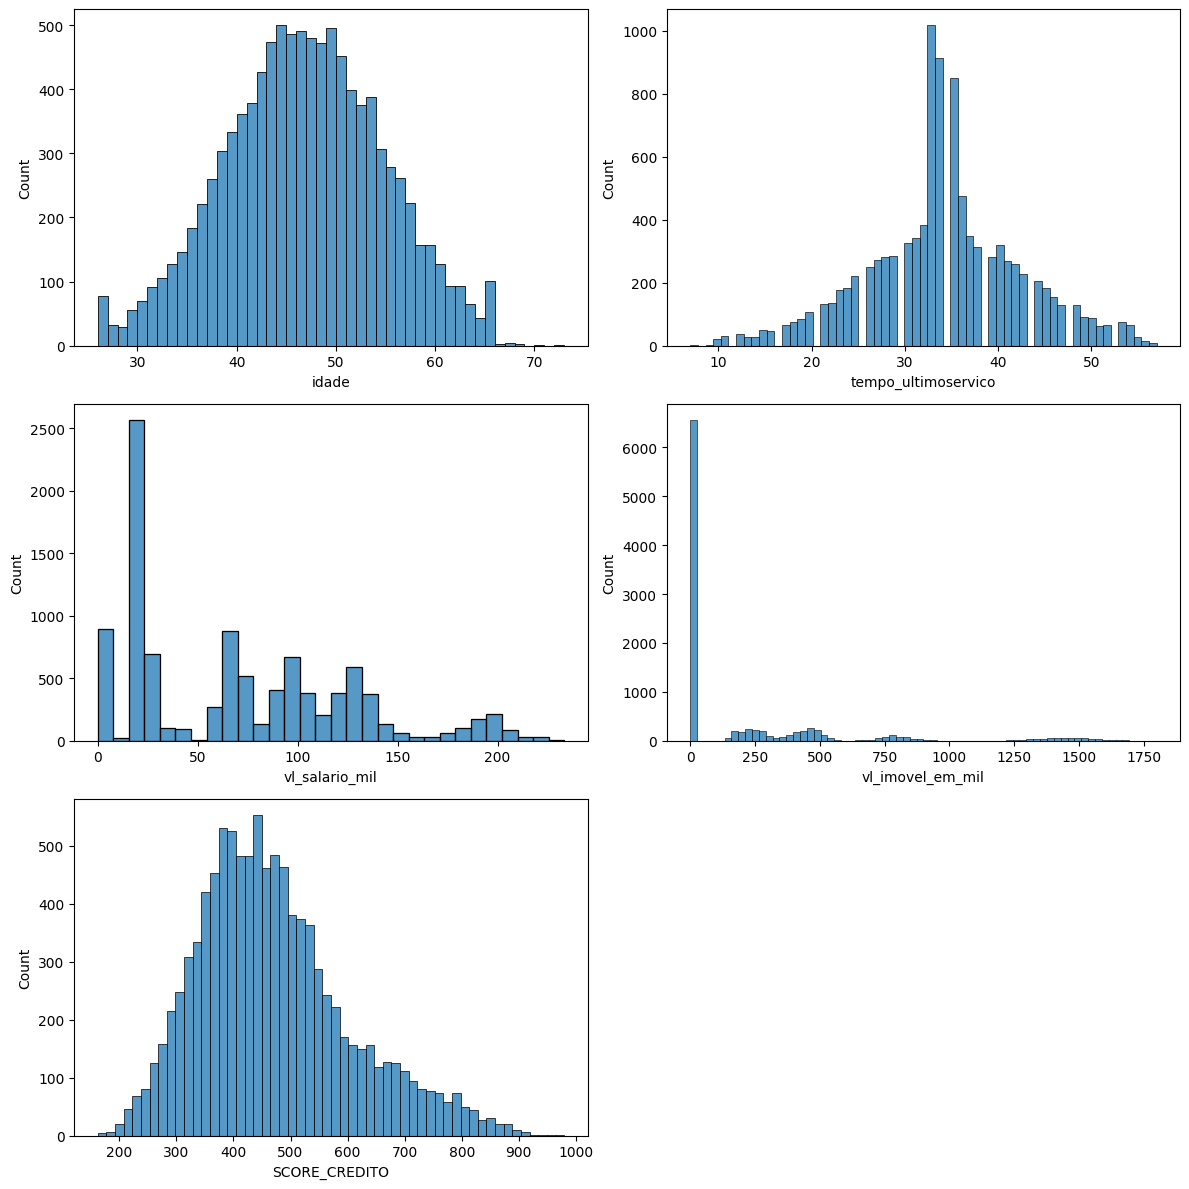

In [ ]:
#Variáveis quantitativas:
plt.figure(figsize=(12, 12))

plt.subplot(3, 2, 1)
sns.histplot(data['idade'])

plt.subplot(3, 2, 2)
sns.histplot(data['tempo_ultimoservico'])

plt.subplot(3, 2, 3)
sns.histplot(data['vl_salario_mil'])

plt.subplot(3, 2, 4)
sns.histplot(data['vl_imovel_em_mil'])

plt.subplot(3, 2, 5)
sns.histplot(data['SCORE_CREDITO'])

plt.tight_layout()
plt.show()

Comentário:

1. Distribuição das variáveis idade e tempo_ultimoservico são estranhas.
Há uma alta fora de tendências no extremos da idade e uma alta fora da tendência na parte central de tempo_ultimoservico.

##BoxPlots

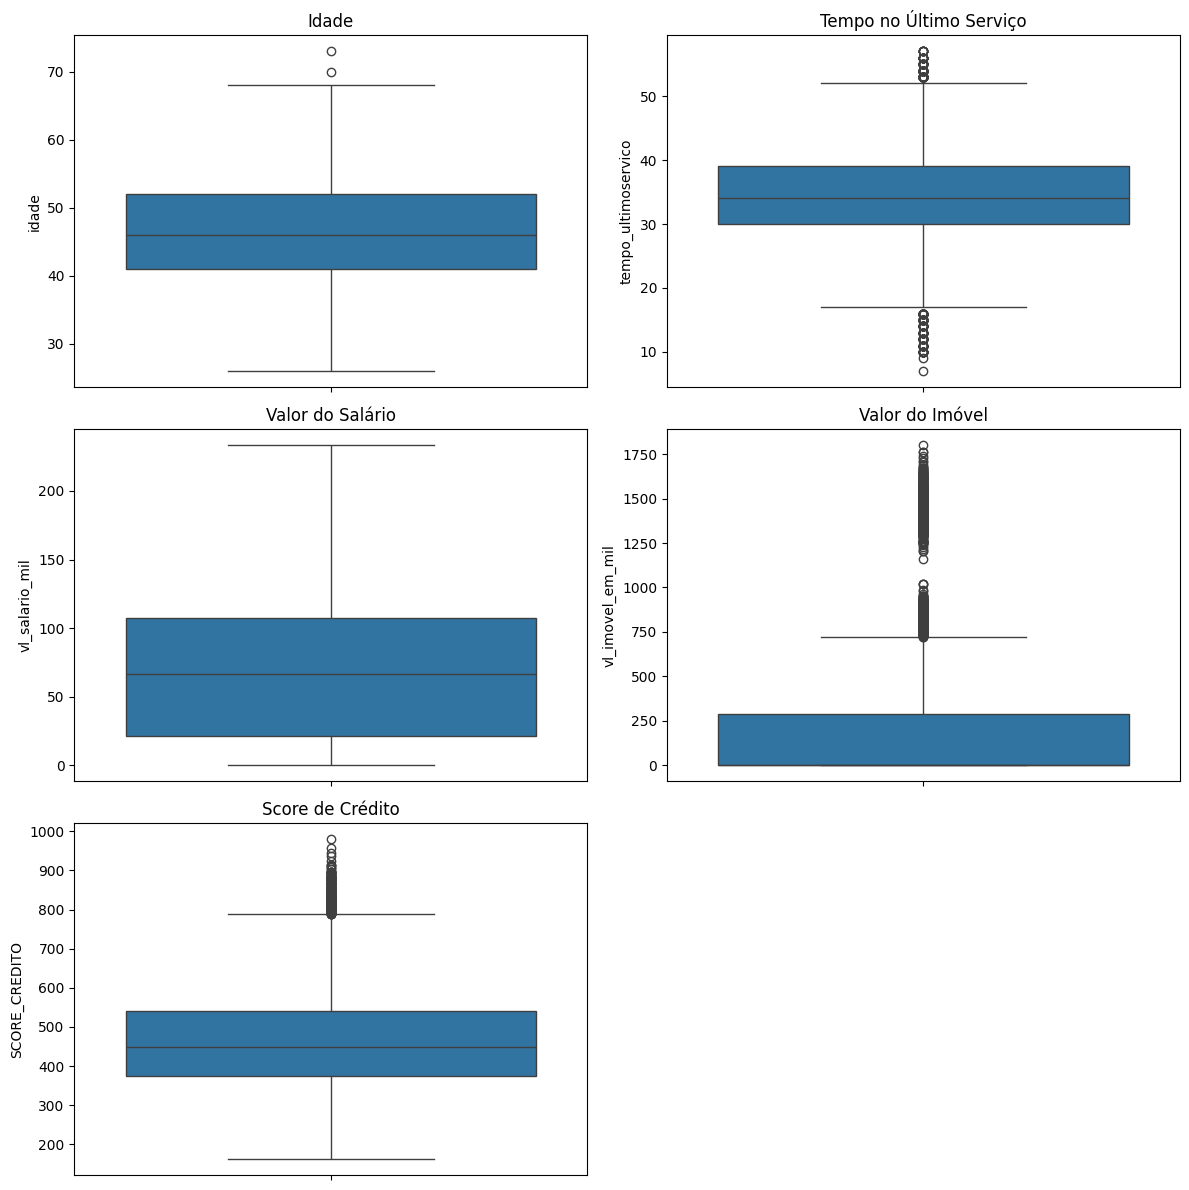

In [ ]:
#Variáveis quantitativas:
plt.figure(figsize=(12, 12))

plt.subplot(3, 2, 1)
sns.boxplot(data['idade'])
plt.title('Idade')

plt.subplot(3, 2, 2)
sns.boxplot(data['tempo_ultimoservico'])
plt.title('Tempo no Último Serviço')

plt.subplot(3, 2, 3)
sns.boxplot(data['vl_salario_mil'])
plt.title('Valor do Salário')

plt.subplot(3, 2, 4)
sns.boxplot(data['vl_imovel_em_mil'])
plt.title('Valor do Imóvel')

plt.subplot(3, 2, 5)
sns.boxplot(data['SCORE_CREDITO'])
plt.title('Score de Crédito')

plt.tight_layout()
plt.show()

##Medidas de Assimetria

In [ ]:
from scipy.stats import kurtosis, skew

In [ ]:
#Coeficiente de assimetria variáveis quantitativas:
for i in var_quant:
  print(f'Coeficiente de assimetria {i}: {round(skew(data[i]),2)}')

Coeficiente de assimetria idade: -0.03
Coeficiente de assimetria Qte_dependentes: 0.51
Coeficiente de assimetria tempo_ultimoservico: -0.06
Coeficiente de assimetria vl_salario_mil: 0.66
Coeficiente de assimetria vl_imovel_em_mil: 2.18
Coeficiente de assimetria Qte_cartoes: 4.61
Coeficiente de assimetria Qte_carros: 0.24


In [ ]:
#Coeficiente de assimetria variável target
print(f'Coeficiente de assimetria {i}: {round(skew(data[var_target[0]]),2)}')

Coeficiente de assimetria Qte_carros: 0.71


In [ ]:
#Coeficiente Kurtose variáveis quantitativas:
for i in var_quant:
  print(f'Coeficiente de Kurtose {i}: {round(kurtosis(data[i], fisher=False),2)}')

Coeficiente de Kurtose idade: 2.71
Coeficiente de Kurtose Qte_dependentes: 2.06
Coeficiente de Kurtose tempo_ultimoservico: 3.31
Coeficiente de Kurtose vl_salario_mil: 2.59
Coeficiente de Kurtose vl_imovel_em_mil: 7.26
Coeficiente de Kurtose Qte_cartoes: 27.08
Coeficiente de Kurtose Qte_carros: 2.24


In [ ]:
#Coeficiente Kurtose variável target:
print(f'Coeficiente de Kurtose {i}: {round(kurtosis(data[var_target[0]], fisher=False),2)}')

Coeficiente de Kurtose Qte_carros: 3.29


##Gráfico de barras

###Variáveis quantitativas discretas

####Qte_dependentes

In [ ]:
#Tabela de frequência
df_qte_dependentes = data['Qte_dependentes'].value_counts().reset_index()
df_qte_dependentes

Qte_dependentes  count
0                0   3704
1                2   1809
2                3   1705
3                1   1655
4                4    987
5                5    267

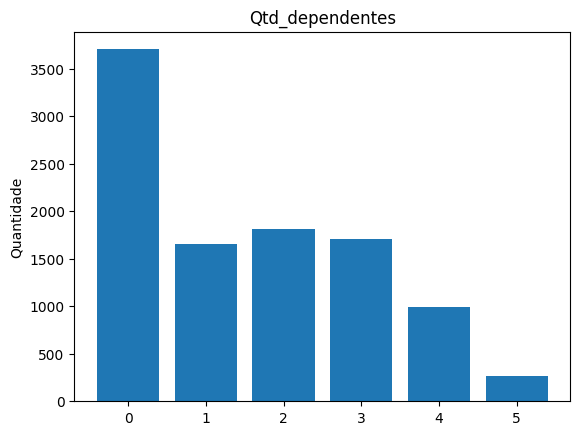

In [ ]:
#Gráfico de barras
plt.bar(df_qte_dependentes['Qte_dependentes'], df_qte_dependentes['count'])
plt.title('Qtd_dependentes')
plt.ylabel('Quantidade')
plt.show()

####Qte_cartoes

In [ ]:
#Tabela de frequências
df_qte_cartoes = data['Qte_cartoes'].value_counts().reset_index()
df_qte_cartoes

Qte_cartoes  count
0            1   9436
1            2    555
2            3    116
3            4     20

In [ ]:
#Tabela de frequências
data['Qte_cartoes'].value_counts(normalize=True).reset_index()

Qte_cartoes  proportion
0            1    0.931767
1            2    0.054804
2            3    0.011455
3            4    0.001975

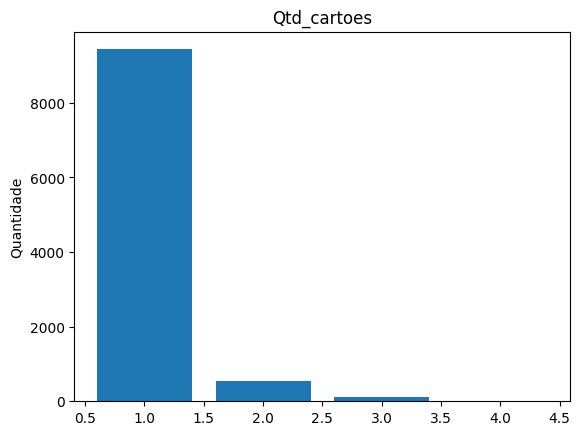

In [ ]:
#Gráfico de barras
plt.bar(df_qte_cartoes['Qte_cartoes'], df_qte_cartoes['count'])
plt.title('Qtd_cartoes')
plt.ylabel('Quantidade')
plt.show()

####Qte_carros

In [ ]:
#Tabela de frequências:
df_qte_carros = data['Qte_carros'].value_counts().reset_index()
df_qte_carros

Qte_carros  count
0           1   5403
1           0   4269
2           2    455

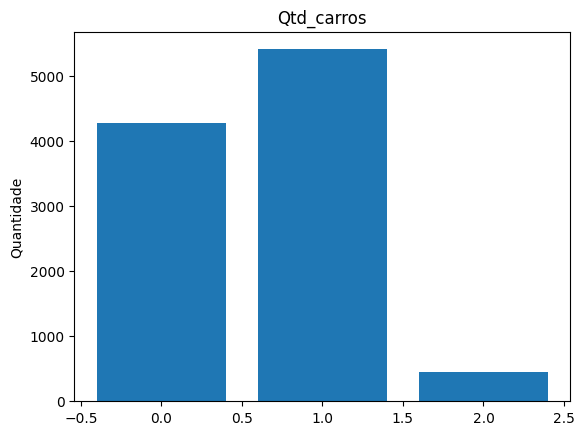

In [ ]:
#Gráfico de barras
plt.bar(df_qte_carros['Qte_carros'], df_qte_carros['count'])
plt.title('Qtd_carros')
plt.ylabel('Quantidade')
plt.show()

###Variáveis qualitativas

####Sexo

In [ ]:
#Tabela de frequência:
df_sexo = data['sexo'].value_counts().reset_index()
df_sexo

sexo  count
0    F   5358
1    M   4769

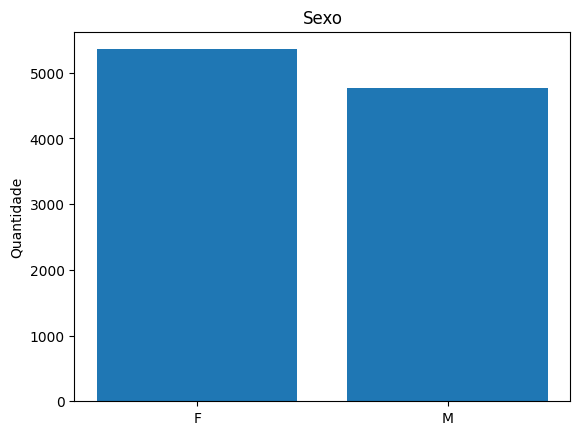

In [ ]:
#Gráfico de barras:
plt.bar(df_sexo['sexo'], df_sexo['count'])
plt.title('Sexo')
plt.ylabel('Quantidade')
plt.show()

####Estado_civil

In [ ]:
#Tabela de frequências
df_civil = data['estado_civil'].value_counts().reset_index()
df_civil

estado_civil  count
0       casado   4687
1     solteiro   3943
2           na    749
3   divorciado    748

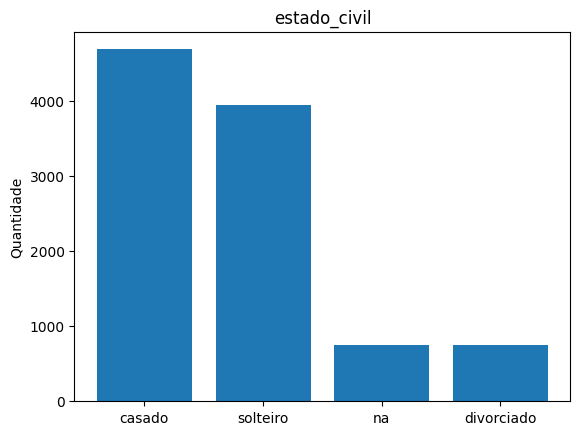

In [ ]:
#Gráfico de barras
plt.bar(df_civil['estado_civil'], df_civil['count'])
plt.title('estado_civil')
plt.ylabel('Quantidade')
plt.show()

In [ ]:
status = data.loc[data['estado_civil'] == 'na'].index
status

Index([    5,    10,    24,    29,    49,    50,    75,    92,    94,   155,
       ...
       10045, 10048, 10061, 10067, 10069, 10074, 10099, 10114, 10117, 10126],
      dtype='int64', length=749)

In [ ]:
data.drop(status, axis=0, inplace=True)

####Escola

In [ ]:
data.loc[data['escola'] == 'ensino fundam', 'escola'] = 0
data.loc[data['escola'] == 'ensino medio', 'escola'] = 1
data.loc[data['escola'] == 'graduacao', 'escola'] = 2
data.loc[data['escola'] == 'mestrado', 'escola'] = 3
data.loc[data['escola'] == 'doutorado', 'escola'] = 4

In [ ]:
#Tabela de frequências
data['escola'].value_counts()

escola
1    3104
0    2127
2    1933
3    1517
4     697
Name: count, dtype: int64

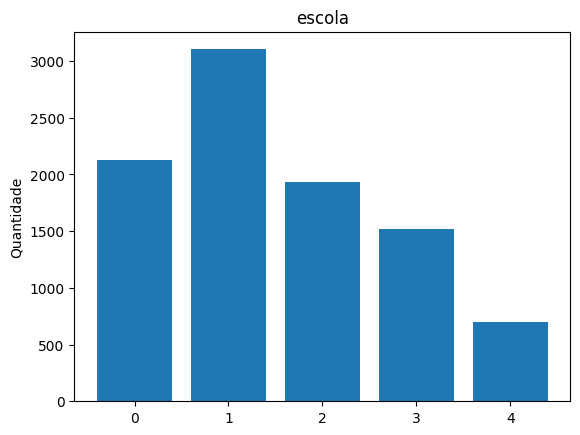

In [ ]:
#Gráfico de barras
plt.bar(data['escola'].value_counts().index, data['escola'].value_counts().values)
plt.title('escola')
plt.ylabel('Quantidade')
plt.show()

####Trabalha

In [ ]:
#Tabela de frequências
df_trabalha = data['trabalha'].value_counts().reset_index()
df_trabalha

trabalha  count
0        1   8548
1        0    830

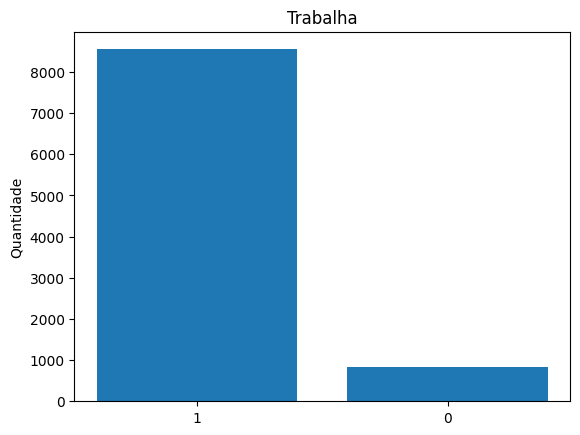

In [ ]:
#Gráfico de barras
plt.bar(data['trabalha'].value_counts().index, data['trabalha'].value_counts().values)
plt.title('Trabalha')
plt.ylabel('Quantidade')
plt.show()

####Reg_moradia

In [ ]:
#Tabela de frequências:
df_reg_moradia = data['reg_moradia'].value_counts().reset_index()
df_reg_moradia

reg_moradia  count
0           3   2114
1           4   1784
2           5   1741
3           6   1710
4           2   1060
5           1    969

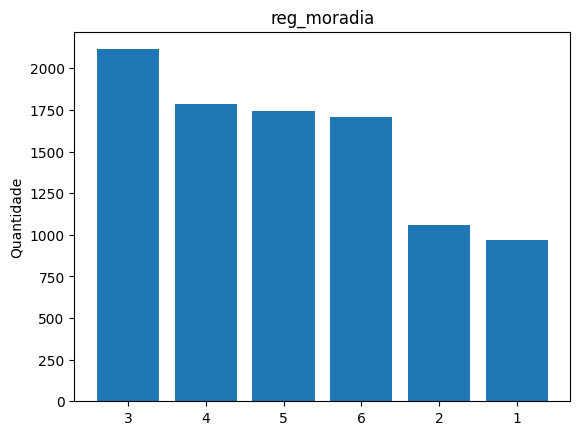

In [ ]:
#Gráfico de barras
plt.bar(data['reg_moradia'].value_counts().index, data['reg_moradia'].value_counts().values)
plt.title('reg_moradia')
plt.ylabel('Quantidade')
plt.show()

####Casa_propria

In [ ]:
#Tabela de frequências
df_casa_propria = data['casa_propria'].value_counts().reset_index()
df_casa_propria

casa_propria  count
0            0   6139
1            1   3239

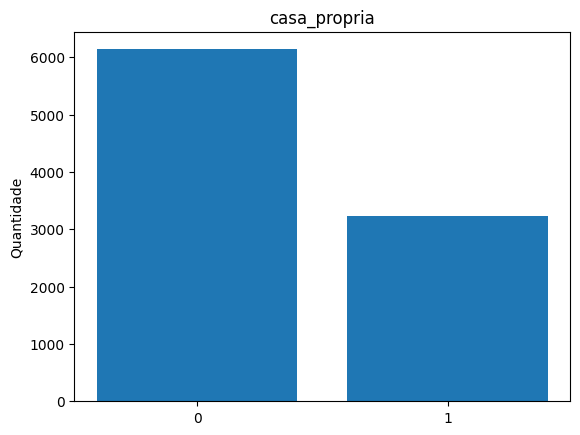

In [ ]:
#Gráfico de barras
plt.bar(data['casa_propria'].value_counts().index, data['casa_propria'].value_counts().values)
plt.title('casa_propria')
plt.ylabel('Quantidade')
plt.show()

#Parte 2

##Variáveis qualitativas

In [ ]:
#Criando os quartis:
minimo = min(data['SCORE_CREDITO'])
Q1 = np.percentile(data['SCORE_CREDITO'], 25)
Q2 = np.percentile(data['SCORE_CREDITO'], 50)
Q3 = np.percentile(data['SCORE_CREDITO'], 75)
maximo = max(data['SCORE_CREDITO'])
print(minimo, Q1, Q2, Q3, maximo)

#Criando as faixas de Scoring:
data.loc[(data.SCORE_CREDITO >= minimo) & (data.SCORE_CREDITO <= Q1), 'fx_score'] = f'{minimo} a {Q1}'
data.loc[(data.SCORE_CREDITO > Q1) & (data.SCORE_CREDITO <= Q2), 'fx_score'] = f'{Q1} a {Q2}'
data.loc[(data.SCORE_CREDITO > Q2) & (data.SCORE_CREDITO <= Q3), 'fx_score'] = f'{Q2} a {Q3}'
data.loc[(data.SCORE_CREDITO > Q3) & (data.SCORE_CREDITO <= maximo), 'fx_score'] = f'{Q3} a {maximo}'

162.0 372.96 447.15999999999997 538.0 979.65


In [ ]:
#Definindo função respostas exercicio 6:

def ana_qualitativas(var_qual):
  '''
  Essa função irá responder a 6ª etapa do projeto integrado.
  1: Teste Qui-Quadrado
  2: Gráfico 100% empilhado
  3: Tabela de frequências
  '''
  #Definindo significância:
  significancia = 0.05

  #Teste Qui-quadrado:
  from scipy.stats import chi2_contingency
  cross_tab_qual_prop = pd.crosstab(index=data['fx_score'], columns=data[var_qual], normalize='index', margins=True)
  cross_tab_qual = pd.crosstab(index=data['fx_score'], columns=data[var_qual], margins=True)
  stat, p, dof, expected = chi2_contingency(cross_tab_qual)

  print(f'Resultado teste Qui-Quadrado:')
  if p <= significancia:
    print(f'p_value={p} é menor que significância. Rejeita H0: Aceita H1: As variáveis são dependentes.\n')
  else:
    print(f'p_value={p} é maior que significância. Não rejeita H0: Aceita H0: As variáveis são independentes.\n')


  #Gráfico 100% empilhado:
  print('Gráfico 100% empilhado:')
  cross_tab_qual_prop.plot(kind='barh',
                        stacked=True,
                        colormap='tab10',
                        figsize=(10, 6))

  plt.legend(loc="lower left", ncol=2)
  plt.xlabel(f"Proporção de Scoring {var_qual}")
  plt.ylabel("Faixa de Scoring")


  for n, x in enumerate([*cross_tab_qual.index.values]):
    for (proportion, count, y_loc) in zip(cross_tab_qual_prop.loc[x],
                                          cross_tab_qual.loc[x],
                                          cross_tab_qual_prop.loc[x].cumsum()):

        plt.text(x=(y_loc - proportion) + (proportion / 2),
                 y=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)',
                 color="black",
                 fontsize=12,
                 fontweight="bold")

  plt.show()
  print('\n')

  #Tabela de frequências:
  print(f'Tabela de frequências:')
  return cross_tab_qual_prop

In [ ]:
data.head()

idade sexo estado_civil escola  Qte_dependentes  tempo_ultimoservico  \
0   45.0    F       casado      2                3                 40.0   
1   58.0    M     solteiro      0                0                 44.0   
2   46.0    M   divorciado      4                3                 35.0   
3   34.0    F     solteiro      3                0                 22.0   
4   49.0    F       casado      3                2                 36.0   

  trabalha  vl_salario_mil reg_moradia casa_propria  vl_imovel_em_mil  \
0        1       40.089665           3            0               0.0   
1        1       66.557645           3            0               0.0   
2        1      123.681821           6            0               0.0   
3        1       19.715934           6            0               0.0   
4        0        0.000000           3            1             437.0   

   Qte_cartoes  Qte_carros  SCORE_CREDITO                     fx_score  
0            1           1          778.0               538.0 a 979.65  
1            1           0          276.3               162.0 a 372.96  
2            1           1          401.0  372.96 a 447.15999999999997  
3            1           0          347.4               162.0 a 372.96  
4            1           2          476.0   447.15999999999997 a 538.0

###Sexo

Resultado teste Qui-Quadrado:
p_value=4.465930200677119e-83 é menor que significância. Rejeita H0: Aceita H1: As variáveis são dependentes.

Gráfico 100% empilhado:


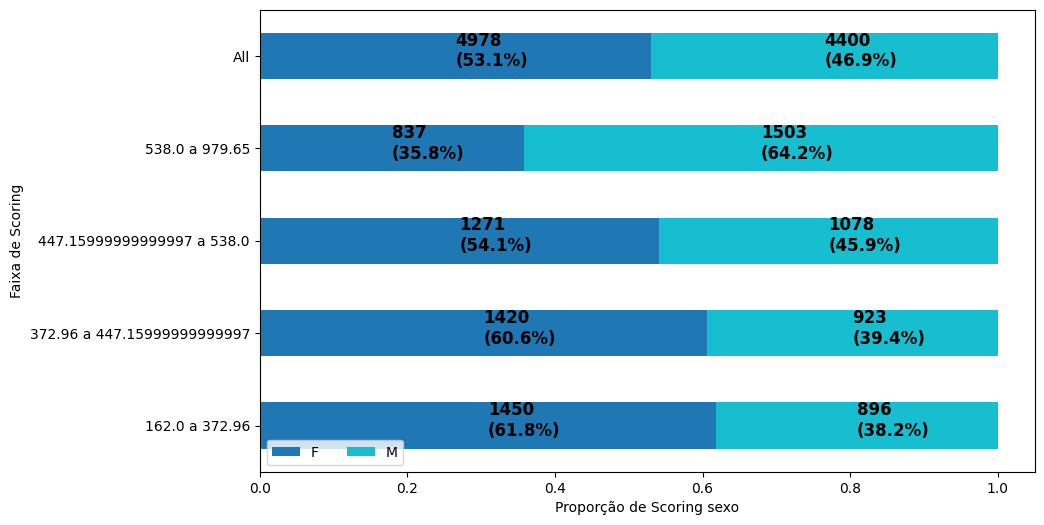



Tabela de frequências:


sexo                                F         M
fx_score                                       
162.0 a 372.96               0.618073  0.381927
372.96 a 447.15999999999997  0.606061  0.393939
447.15999999999997 a 538.0   0.541081  0.458919
538.0 a 979.65               0.357692  0.642308
All                          0.530817  0.469183

In [ ]:
ana_qualitativas('sexo')

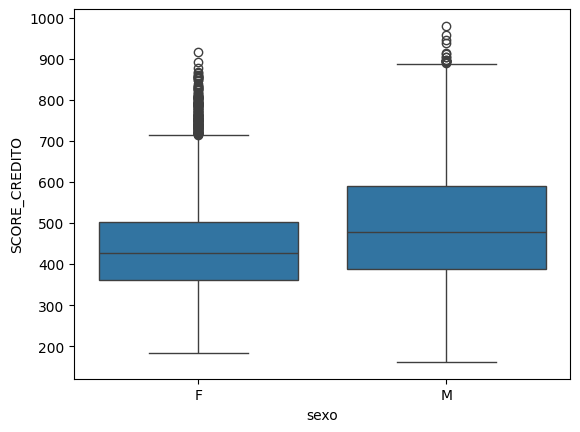

In [ ]:
sns.boxplot(x=data['sexo'], y=data['SCORE_CREDITO'])
plt.show()

###Estado_civil

Resultado teste Qui-Quadrado:
p_value=6.063287493501426e-11 é menor que significância. Rejeita H0: Aceita H1: As variáveis são dependentes.

Gráfico 100% empilhado:


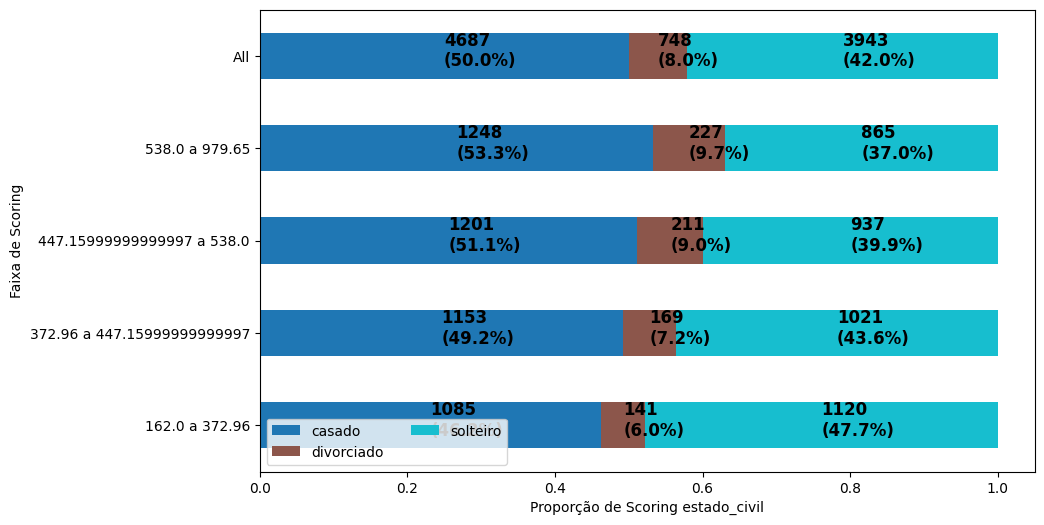



Tabela de frequências:


estado_civil                   casado  divorciado  solteiro
fx_score                                                   
162.0 a 372.96               0.462489    0.060102  0.477408
372.96 a 447.15999999999997  0.492104    0.072130  0.435766
447.15999999999997 a 538.0   0.511281    0.089825  0.398893
538.0 a 979.65               0.533333    0.097009  0.369658
All                          0.499787    0.079761  0.420452

In [ ]:
ana_qualitativas('estado_civil')

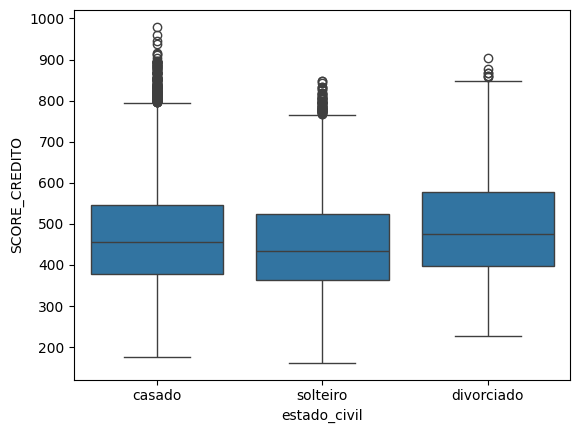

In [ ]:
#BoxPlot
sns.boxplot(x=data['estado_civil'], y=data['SCORE_CREDITO'])
plt.show()

###Escola

Resultado teste Qui-Quadrado:
p_value=2.0934201241871678e-50 é menor que significância. Rejeita H0: Aceita H1: As variáveis são dependentes.

Gráfico 100% empilhado:


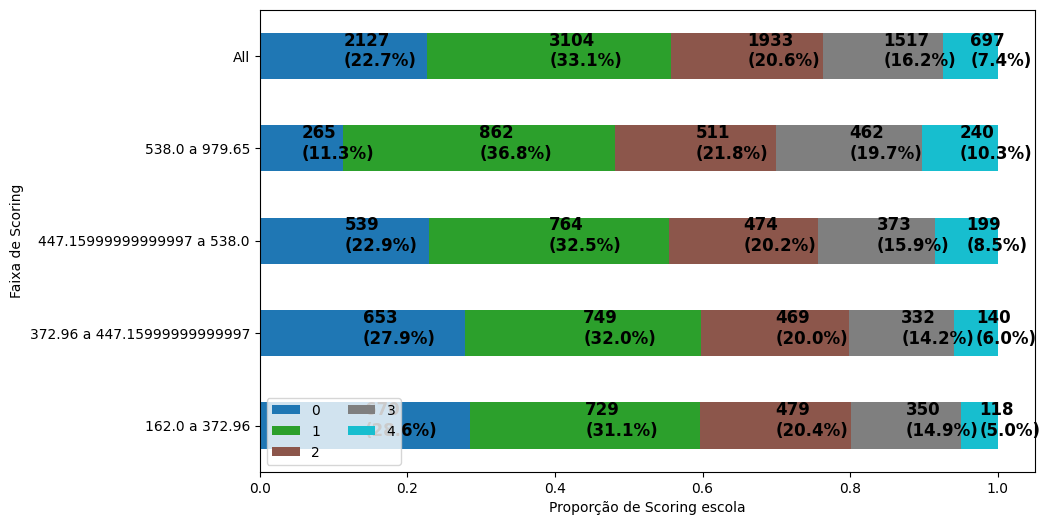



Tabela de frequências:


escola                              0         1         2         3         4
fx_score                                                                     
162.0 a 372.96               0.285592  0.310742  0.204177  0.149190  0.050298
372.96 a 447.15999999999997  0.278703  0.319676  0.200171  0.141699  0.059752
447.15999999999997 a 538.0   0.229459  0.325245  0.201788  0.158791  0.084717
538.0 a 979.65               0.113248  0.368376  0.218376  0.197436  0.102564
All                          0.226807  0.330987  0.206121  0.161762  0.074323

In [ ]:
ana_qualitativas('escola')

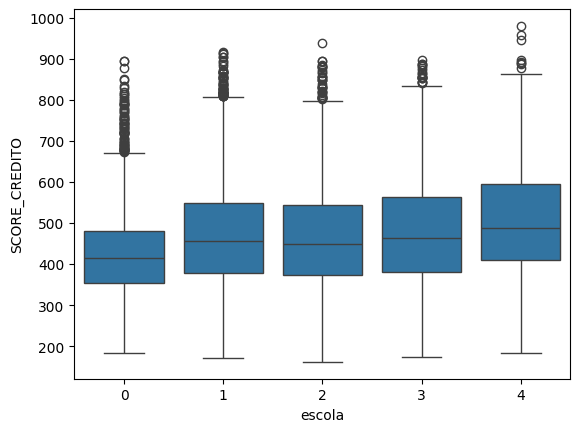

In [ ]:
#BoxPlot
sns.boxplot(x=data['escola'], y=data['SCORE_CREDITO'])
plt.show()

###Trabalha

Resultado teste Qui-Quadrado:
p_value=1.4323211421841523e-113 é menor que significância. Rejeita H0: Aceita H1: As variáveis são dependentes.

Gráfico 100% empilhado:


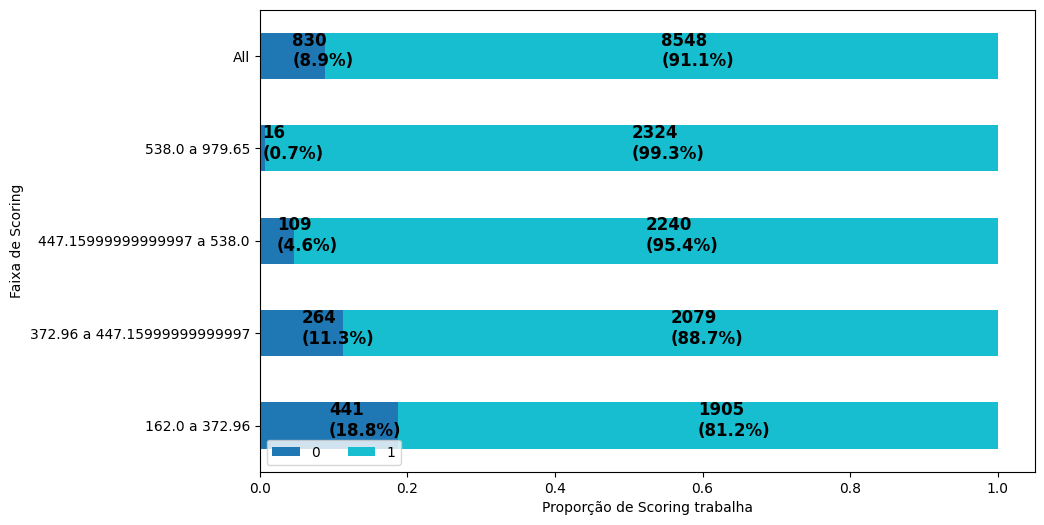



Tabela de frequências:


trabalha                            0         1
fx_score                                       
162.0 a 372.96               0.187980  0.812020
372.96 a 447.15999999999997  0.112676  0.887324
447.15999999999997 a 538.0   0.046403  0.953597
538.0 a 979.65               0.006838  0.993162
All                          0.088505  0.911495

In [ ]:
ana_qualitativas('trabalha')

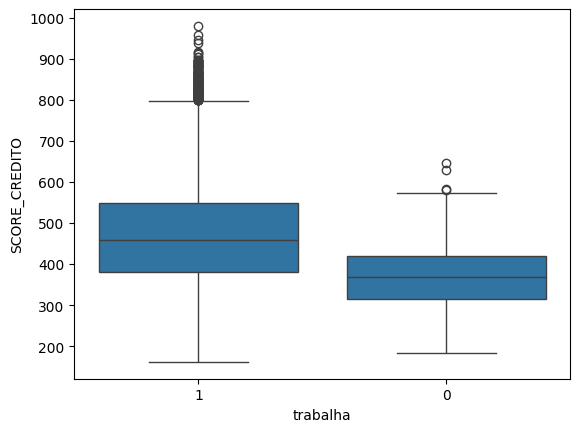

In [ ]:
sns.boxplot(x=data['trabalha'], y=data['SCORE_CREDITO'])
plt.show()

###Reg_moradia

Resultado teste Qui-Quadrado:
p_value=1.5700596695142853e-189 é menor que significância. Rejeita H0: Aceita H1: As variáveis são dependentes.

Gráfico 100% empilhado:


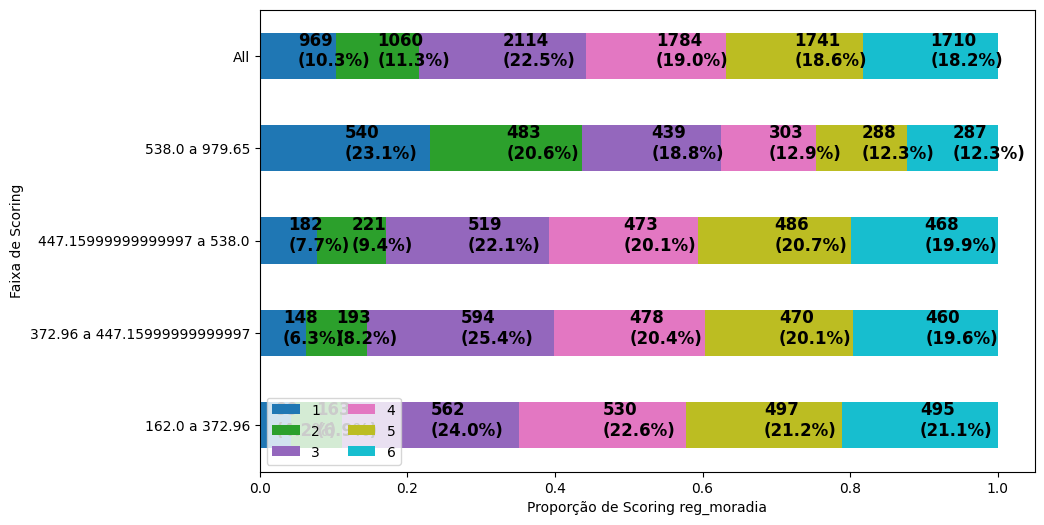



Tabela de frequências:


reg_moradia                         1         2         3         4         5  \
fx_score                                                                        
162.0 a 372.96               0.042199  0.069480  0.239557  0.225916  0.211850   
372.96 a 447.15999999999997  0.063167  0.082373  0.253521  0.204012  0.200598   
447.15999999999997 a 538.0   0.077480  0.094083  0.220945  0.201362  0.206897   
538.0 a 979.65               0.230769  0.206410  0.187607  0.129487  0.123077   
All                          0.103327  0.113030  0.225421  0.190232  0.185647   

reg_moradia                         6  
fx_score                               
162.0 a 372.96               0.210997  
372.96 a 447.15999999999997  0.196329  
447.15999999999997 a 538.0   0.199234  
538.0 a 979.65               0.122650  
All                          0.182342

In [ ]:
ana_qualitativas('reg_moradia')

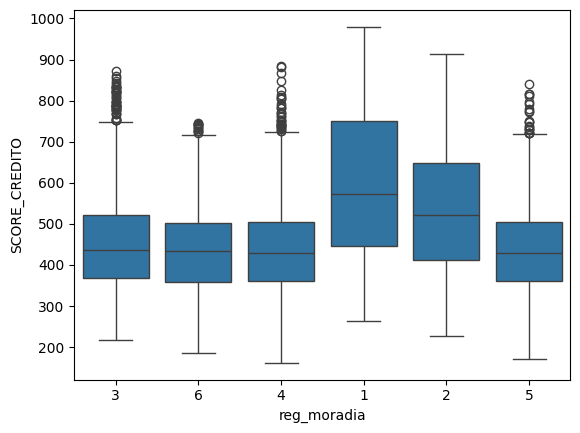

In [ ]:
sns.boxplot(x=data['reg_moradia'], y=data['SCORE_CREDITO'])
plt.show()

###Casa_propria

Resultado teste Qui-Quadrado:
p_value=2.080042700389947e-101 é menor que significância. Rejeita H0: Aceita H1: As variáveis são dependentes.

Gráfico 100% empilhado:


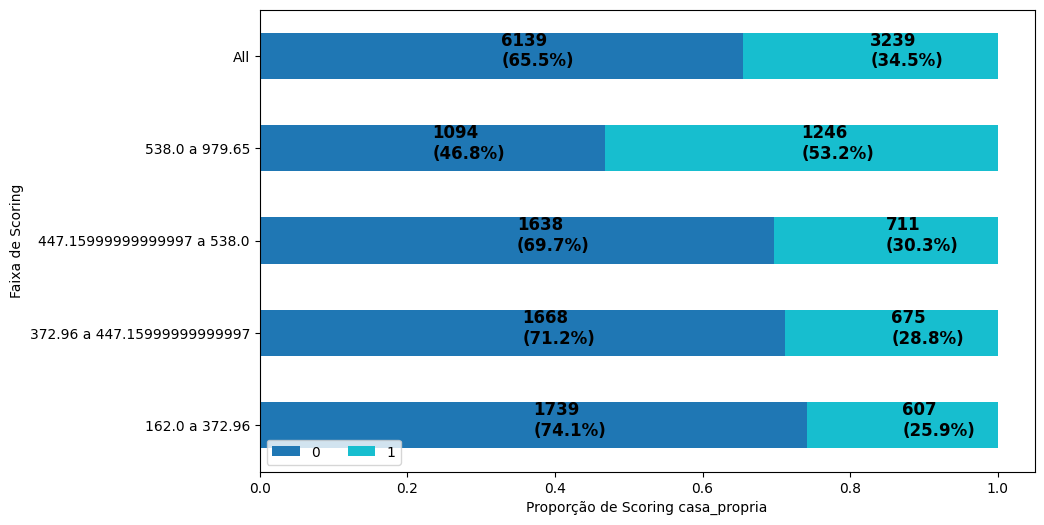



Tabela de frequências:


casa_propria                        0         1
fx_score                                       
162.0 a 372.96               0.741262  0.258738
372.96 a 447.15999999999997  0.711908  0.288092
447.15999999999997 a 538.0   0.697318  0.302682
538.0 a 979.65               0.467521  0.532479
All                          0.654617  0.345383

In [ ]:
ana_qualitativas('casa_propria')

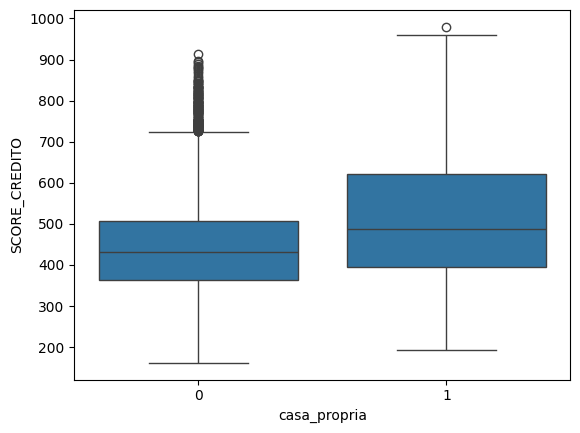

In [ ]:
sns.boxplot(x=data['casa_propria'], y=data['SCORE_CREDITO'])
plt.show()

##Variáveis quantitativas

In [ ]:
from scipy.stats import pearsonr

In [ ]:
df_quant_target = pd.concat([data[var_quant], data['SCORE_CREDITO']], axis=1)

In [ ]:
#Definindo função respostas exercicio 7:

def ana_quantitativas(var_quant):
  '''
  Essa função irá responder a 7ª etapa do projeto integrado.
  1: Gráfico de dispersão
  2: Análise correlação de Pearson
  3: Coeficiente de variação
  '''


  #Gráfico de dispersão:
  print('Gráfico de dispersão:')
  sns.scatterplot(x=var_quant, y='SCORE_CREDITO', data=df_quant_target)
  plt.xlabel(var_quant)
  plt.ylabel('SCORE_CREDITO')
  plt.show()
  print('\n')

  #Análise correlação de Pearson:
  print('Análise correlação de Pearson:')
  corr, p_value = pearsonr(data['SCORE_CREDITO'], data[var_quant])
  if p_value <= 0.05:
    print(f'p_value={round(p_value,2)} <= 0.05 então reijeito H0. Há correlação!  - Correlação: {round(corr,2)}\n')
  else:
    print(f'p_value={round(p_value,2)} > 0.05 então não rejeita H0. Não há correlação! - Correlação: {round(corr,2)}\n')

  #Coeficiente de variação:
  print(f'Coeficiente de variação: {round(data[var_quant].std() / data[var_quant].mean(),2)*100}%')
  print('\n')

###Matriz correlação

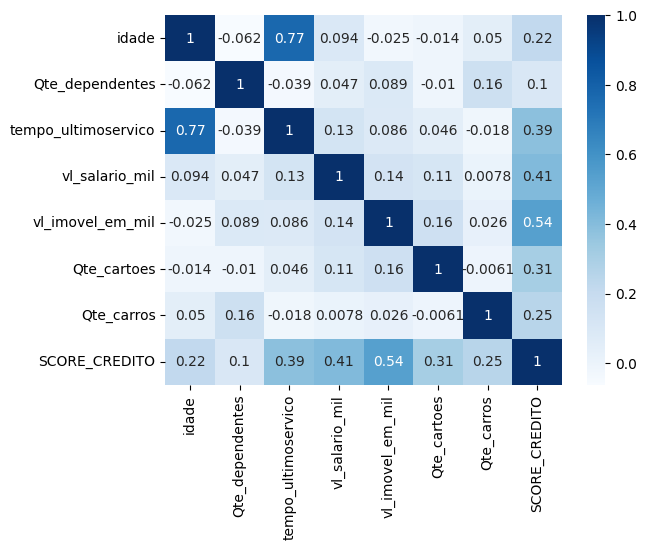

In [ ]:
sns.heatmap(df_quant_target.corr(), annot=True, cmap='Blues')
plt.show()

1. As variáveis idade e tempo_ultimoservico possuem correlação forte.
2. Como tempo_ultimoservico possue correlação mais forte que idade, inicialmente criaremos o modelo com tempo_ultimoservico

###Idade

Gráfico de dispersão:


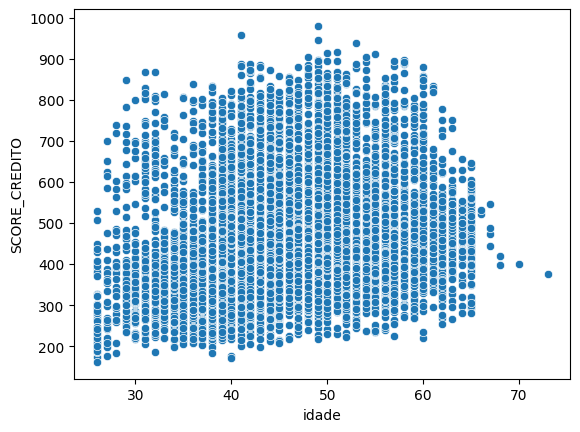



Análise correlação de Pearson:
p_value=0.0 <= 0.05 então reijeito H0. Há correlação!  - Correlação: 0.22

Coeficiente de variação: 17.0%




In [ ]:
ana_quantitativas('idade')

###Qte_dependentes

Gráfico de dispersão:


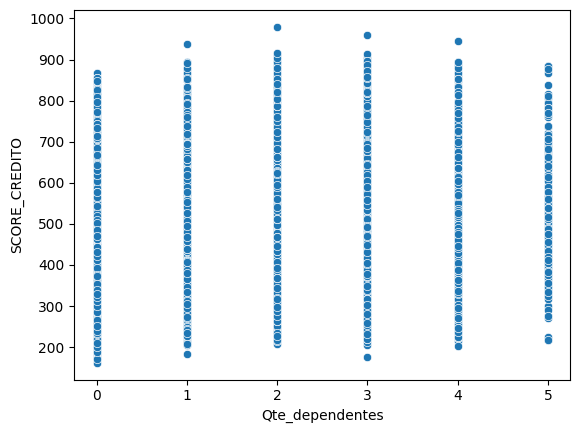



Análise correlação de Pearson:
p_value=0.0 <= 0.05 então reijeito H0. Há correlação!  - Correlação: 0.1

Coeficiente de variação: 101.0%




In [ ]:
ana_quantitativas('Qte_dependentes')

###tempo_ultimoservico

Gráfico de dispersão:


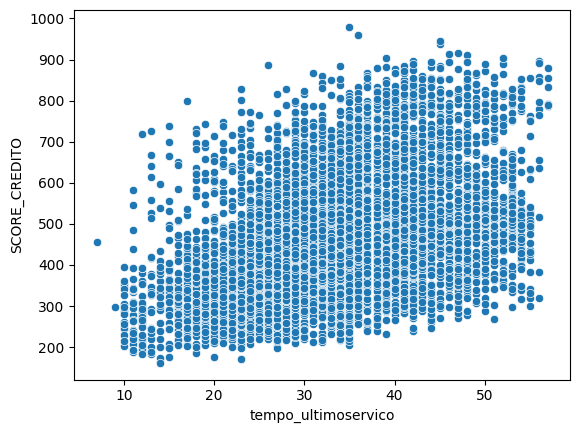



Análise correlação de Pearson:
p_value=0.0 <= 0.05 então reijeito H0. Há correlação!  - Correlação: 0.39

Coeficiente de variação: 24.0%




In [ ]:
ana_quantitativas('tempo_ultimoservico')

###vl_salario_mil

Gráfico de dispersão:


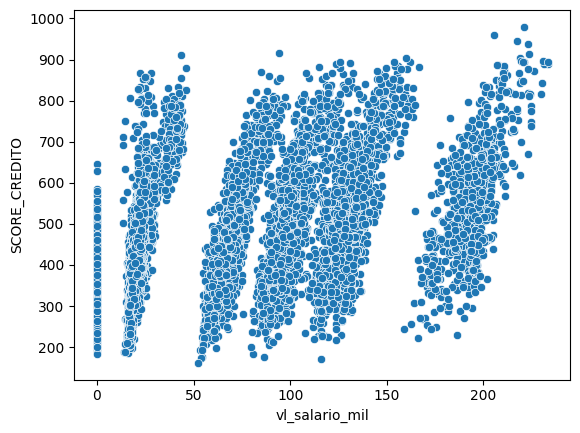



Análise correlação de Pearson:
p_value=0.0 <= 0.05 então reijeito H0. Há correlação!  - Correlação: 0.41

Coeficiente de variação: 79.0%




In [ ]:
ana_quantitativas('vl_salario_mil')

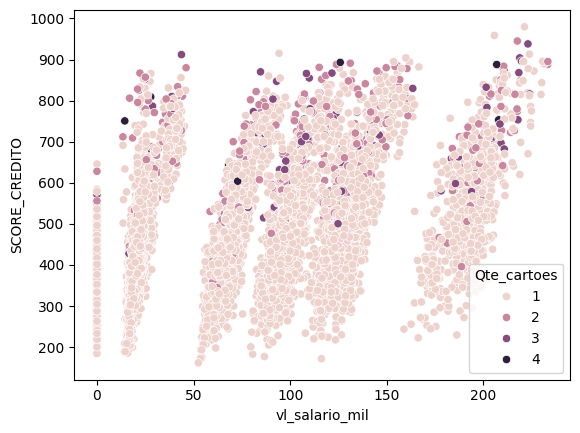

In [ ]:
sns.scatterplot(x='vl_salario_mil', y='SCORE_CREDITO', data=data, hue='Qte_cartoes')
plt.show()

###vl_imovel_em_mil

Gráfico de dispersão:


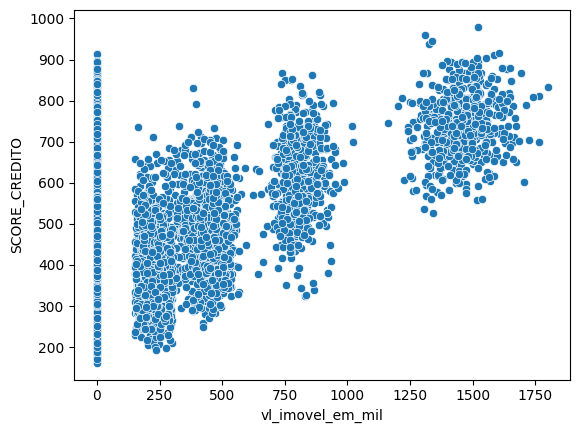



Análise correlação de Pearson:
p_value=0.0 <= 0.05 então reijeito H0. Há correlação!  - Correlação: 0.54

Coeficiente de variação: 184.0%




In [ ]:
ana_quantitativas('vl_imovel_em_mil')

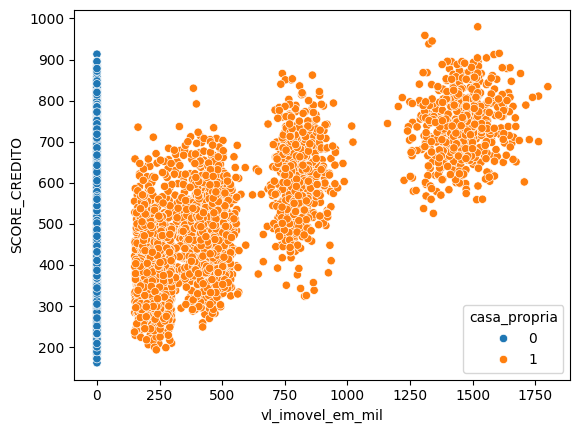

In [ ]:
sns.scatterplot(x='vl_imovel_em_mil', y='SCORE_CREDITO', data=data, hue='casa_propria')
plt.show()

Com o gráfico acima é possível concluir que há correlação entre casa_propria e vl_imovel_em_mil

###Qte_cartoes

Gráfico de dispersão:


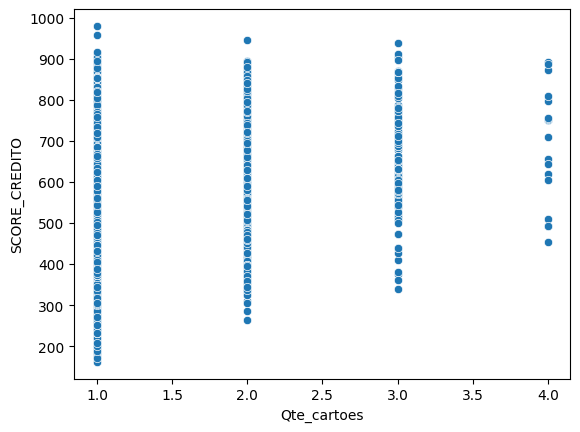



Análise correlação de Pearson:
p_value=0.0 <= 0.05 então reijeito H0. Há correlação!  - Correlação: 0.31

Coeficiente de variação: 30.0%




In [ ]:
ana_quantitativas('Qte_cartoes')

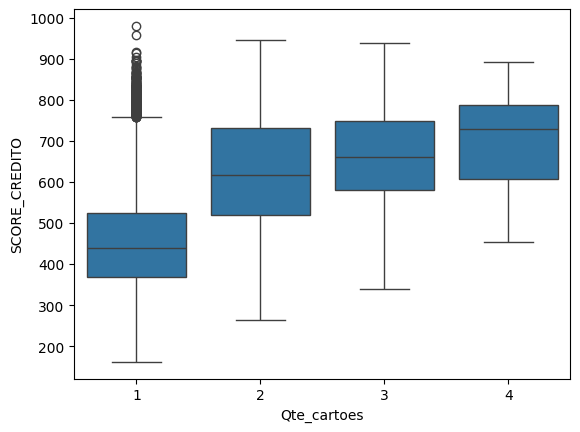

In [ ]:
import seaborn as sns

# Gráfico de dispersão
sns.boxplot(x='Qte_cartoes', y='SCORE_CREDITO', data=data)
plt.show()

###Qte_carros

Gráfico de dispersão:


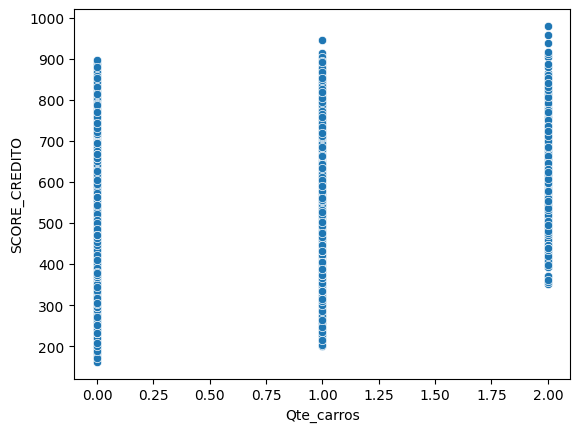



Análise correlação de Pearson:
p_value=0.0 <= 0.05 então reijeito H0. Há correlação!  - Correlação: 0.25

Coeficiente de variação: 92.0%




In [ ]:
ana_quantitativas('Qte_carros')

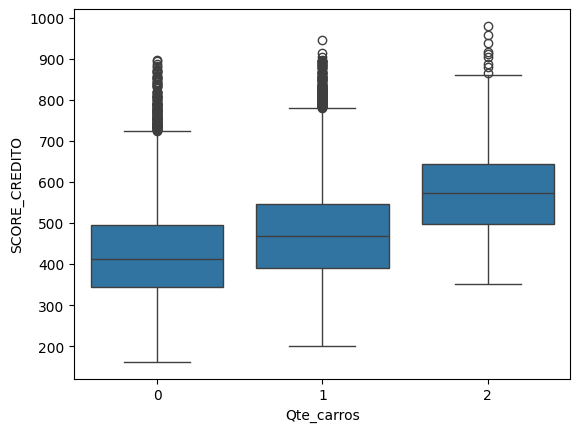

In [ ]:
sns.boxplot(x='Qte_carros', y='SCORE_CREDITO', data=data)
plt.show()

##Construção do modelo

1. Como tempo_ultimoservico possue correlação mais forte que idade, inicialmente criaremos o modelo com tempo_ultimoservico

###Seleção de features

É necessário eliminar multicolinearidade, ou seja, variáveis que possuem correlação entre si

####Qualitativas vs qualitativas

In [ ]:
def corr_qual(var_qual_1, var_qual, data):

  var_corr = []

  for i in var_qual:

    #Tabela de frequências:
    cross_tab_qual_quant_prop = pd.crosstab(index=data[i], columns=data[var_qual_1], margins=True, normalize=True)
    cross_tab_qual_quant = pd.crosstab(index=data[i], columns=data[var_qual_1], margins=True)

    #Teste Qui-Quadrado:
    from scipy.stats import chi2_contingency
    stat, p, dof, expected = chi2_contingency(cross_tab_qual_quant)

    #definindo significancia:
    significancia = 0.05

    if p <= significancia:
      var_corr.append(i)
      print(f'Para variável {i} ---> p_value={p} <= {significancia}. Rejeita H0: Aceita H1: As variáveis são dependentes.')
      print('Há correlação!\n')
    else:
      print(f'Para variável {i} ---> p_value={p} > {significancia}. Não rejeita H0: Aceita H0: As variáveis são independentes.')
      print('Não há correlação!\n')

  print(f'As variáveis que possuem correlação com {var_qual_1} é(são): {var_corr}')

#####Reg_moradia

In [ ]:
corr_qual('reg_moradia', var_qual, data)

Para variável sexo ---> p_value=0.7850929357807958 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável estado_civil ---> p_value=0.9331835229758187 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável escola ---> p_value=0.3695569472130732 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável trabalha ---> p_value=0.13185942985005486 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável reg_moradia ---> p_value=0.0 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para variável casa_propria ---> p_value=0.0 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

As variáveis que possuem correlação com reg_moradia é(são): ['reg_moradia', 'casa_propria']


#####Trabalha

In [ ]:
corr_qual('trabalha', var_qual, data)

Para variável sexo ---> p_value=3.98350803152319e-138 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para variável estado_civil ---> p_value=0.7861874831426319 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável escola ---> p_value=8.816885217531416e-13 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para variável trabalha ---> p_value=0.0 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para variável reg_moradia ---> p_value=0.13185942985005486 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável casa_propria ---> p_value=0.3079298343695503 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

As variáveis que possuem correlação com trabalha é(são): ['sexo', 'escola', 'trabalha']


#####Sexo

In [ ]:
corr_qual('sexo', var_qual, data)

Para variável sexo ---> p_value=0.0 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para variável estado_civil ---> p_value=0.8856680813336424 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável escola ---> p_value=1.176648597070099e-50 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para variável trabalha ---> p_value=3.98350803152319e-138 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para variável reg_moradia ---> p_value=0.7850929357807958 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável casa_propria ---> p_value=0.9590648911755484 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

As variáveis que possuem correlação com sexo é(são): ['sexo', 'escola', 'trabalha']


#####estado_civil

In [ ]:
corr_qual('estado_civil', var_qual, data)

Para variável sexo ---> p_value=0.8856680813336424 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável estado_civil ---> p_value=0.0 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para variável escola ---> p_value=0.43069755157383305 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável trabalha ---> p_value=0.7861874831426319 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável reg_moradia ---> p_value=0.9331835229758189 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável casa_propria ---> p_value=2.688695931024011e-99 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

As variáveis que possuem correlação com estado_civil é(são): ['estado_civil', 'casa_propria']


#####escola

In [ ]:
corr_qual('escola', var_qual, data)

Para variável sexo ---> p_value=1.176648597070099e-50 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para variável estado_civil ---> p_value=0.4306975515738326 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável escola ---> p_value=0.0 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para variável trabalha ---> p_value=8.816885217531416e-13 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para variável reg_moradia ---> p_value=0.3695569472130733 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável casa_propria ---> p_value=0.868317198693289 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

As variáveis que possuem correlação com escola é(são): ['sexo', 'escola', 'trabalha']


#####casa_propria

In [ ]:
corr_qual('casa_propria', var_qual, data)

Para variável sexo ---> p_value=0.9590648911755484 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável estado_civil ---> p_value=2.688695931024011e-99 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para variável escola ---> p_value=0.868317198693289 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável trabalha ---> p_value=0.3079298343695503 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável reg_moradia ---> p_value=0.0 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para variável casa_propria ---> p_value=0.0 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

As variáveis que possuem correlação com casa_propria é(são): ['estado_civil', 'reg_moradia', 'casa_propria']


####Qualitativas vs quantitativas

In [ ]:
def corr_qual_quant(var_qual, var_quant, data):

  var_corr = []

  for i in var_quant:
    #Criando os quartis:
    minimo = min(data[i])
    Q1 = np.percentile(data[i], 25)
    Q2 = np.percentile(data[i], 50)
    Q3 = np.percentile(data[i], 75)
    maximo = max(data[i])

    #Criando as faixas de Scoring:
    data.loc[(data[i] >= minimo) & (data[i] <= Q1), f'fx_{i}'] = f'{minimo} a {Q1}'
    data.loc[(data[i] > Q1) & (data[i] <= Q2), f'fx_{i}'] = f'{Q1} a {Q2}'
    data.loc[(data[i] > Q2) & (data[i] <= Q3), f'fx_{i}'] = f'{Q2} a {Q3}'
    data.loc[(data[i] > Q3) & (data[i] <= maximo), f'fx_{i}'] = f'{Q3} a {maximo}'

    #Tabela de frequências:
    cross_tab_qual_quant_prop = pd.crosstab(index=data[f'fx_{i}'], columns=data[var_qual], margins=True, normalize=True)
    cross_tab_qual_quant = pd.crosstab(index=data[f'fx_{i}'], columns=data[var_qual], margins=True)

    #Teste Qui-Quadrado:
    from scipy.stats import chi2_contingency
    stat, p, dof, expected = chi2_contingency(cross_tab_qual_quant)

    #definindo significancia:
    significancia = 0.05

    if p <= significancia:
      var_corr.append(i)
      print(f'Para variável {i} ---> p_value={p} <= {significancia}. Rejeita H0: Aceita H1: As variáveis são dependentes.')
      print('Há correlação!\n')
    else:
      print(f'Para variável {i} ---> p_value={p} > {significancia}. Não rejeita H0: Aceita H0: As variáveis são independentes.')
      print('Não há correlação!\n')

  print(f'As variáveis que possuem correlação com {var_qual} é(são): {var_corr}')

#####Reg_moradia

In [ ]:
corr_qual_quant('reg_moradia', var_quant, data)

Para variável idade ---> p_value=0.0007427471096614546 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para variável Qte_dependentes ---> p_value=0.753132853447554 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável tempo_ultimoservico ---> p_value=3.63722299904812e-15 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para variável vl_salario_mil ---> p_value=3.2296195317838145e-26 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para variável vl_imovel_em_mil ---> p_value=0.0 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para variável Qte_cartoes ---> p_value=4.628792719022287e-32 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para variável Qte_carros ---> p_value=0.14838313291379782 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

As variáveis que pos

#####Trabalha

In [ ]:
corr_qual_quant('trabalha', var_quant, data)

Para variável idade ---> p_value=0.9988465382907491 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável Qte_dependentes ---> p_value=0.8765674114229148 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável tempo_ultimoservico ---> p_value=0.4676993362401348 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável vl_salario_mil ---> p_value=0.0 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para variável vl_imovel_em_mil ---> p_value=0.5611106221216542 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável Qte_cartoes ---> p_value=0.008617733968689326 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para variável Qte_carros ---> p_value=0.9995698851880974 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

As 

#####Sexo

In [ ]:
corr_qual_quant('sexo', var_quant, data)

Para variável idade ---> p_value=0.7914371455073103 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável Qte_dependentes ---> p_value=0.72470656853176 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável tempo_ultimoservico ---> p_value=0.13157820617724625 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável vl_salario_mil ---> p_value=0.0 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para variável vl_imovel_em_mil ---> p_value=0.13207954514389214 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável Qte_cartoes ---> p_value=2.4035639043535246e-14 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para variável Qte_carros ---> p_value=0.3755976087827844 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

A

#####estado_civil

In [ ]:
corr_qual_quant('estado_civil', var_quant, data)

Para variável idade ---> p_value=7.81255862023667e-09 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para variável Qte_dependentes ---> p_value=0.0 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para variável tempo_ultimoservico ---> p_value=0.018616655836972206 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para variável vl_salario_mil ---> p_value=0.0778283297488845 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável vl_imovel_em_mil ---> p_value=8.64849679365746e-108 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para variável Qte_cartoes ---> p_value=0.00039307224428419054 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para variável Qte_carros ---> p_value=3.2661616090990748e-111 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

As variáveis que possuem 

#####escola

In [ ]:
corr_qual_quant('escola', var_quant, data)

Para variável idade ---> p_value=0.023598068581164592 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para variável Qte_dependentes ---> p_value=0.931737645536369 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável tempo_ultimoservico ---> p_value=0.011337688920637629 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para variável vl_salario_mil ---> p_value=5.3888233385117946e-136 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para variável vl_imovel_em_mil ---> p_value=0.12037608756976048 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!

Para variável Qte_cartoes ---> p_value=0.0016758246720936392 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para variável Qte_carros ---> p_value=0.20640596047869061 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlaç

#####casa_propria

In [ ]:
corr_qual_quant('casa_propria', var_quant, data)

Para variável idade ---> p_value=0.008061868012395959 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para variável Qte_dependentes ---> p_value=3.3387387133088725e-66 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para variável tempo_ultimoservico ---> p_value=1.0476450796639928e-06 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para variável vl_salario_mil ---> p_value=3.064671899801917e-07 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para variável vl_imovel_em_mil ---> p_value=0.0 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para variável Qte_cartoes ---> p_value=1.1366832473922104e-08 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

Para variável Qte_carros ---> p_value=6.186967116754896e-09 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!

As variáveis que possuem corre

####Matrix de correlação

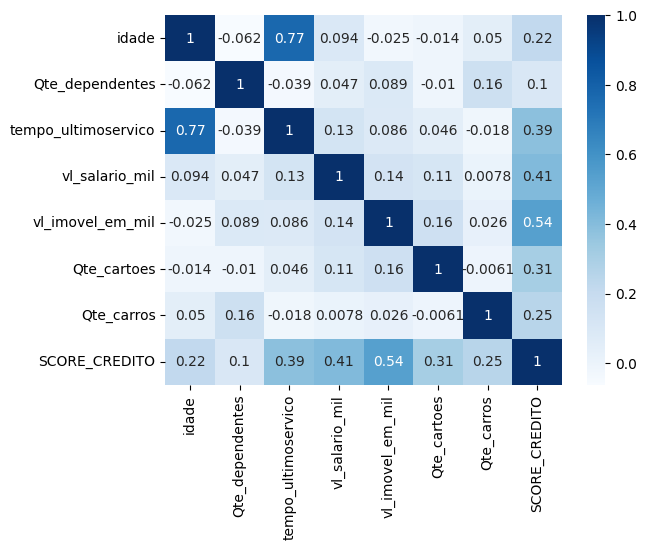

In [ ]:
sns.heatmap(df_quant_target.corr(), annot=True, cmap='Blues')
plt.show()

1. Como tempo_ultimoservico possue correlação mais forte que idade, inicialmente criaremos o modelo com tempo_ultimoservico ---> Remover idade

2. Qte_dependentes tem pouca correlação com SCORE_CREDITO ---> Remover Qte_dependentes

In [ ]:
selected_features = ['tempo_ultimoservico', 'vl_salario_mil', 'vl_imovel_em_mil', 'Qte_cartoes', 'Qte_carros', 'SCORE_CREDITO', 'casa_propria']

In [ ]:
df_selected_features = data[selected_features]
df_selected_features

tempo_ultimoservico  vl_salario_mil  vl_imovel_em_mil  Qte_cartoes  \
0                     40.0       40.089665               0.0            1   
1                     44.0       66.557645               0.0            1   
2                     35.0      123.681821               0.0            1   
3                     22.0       19.715934               0.0            1   
4                     36.0        0.000000             437.0            1   
...                    ...             ...               ...          ...   
10121                 36.0       20.977978             405.0            1   
10122                 45.0      100.128971               0.0            1   
10123                 31.0       89.805996               0.0            1   
10124                 43.0       19.799306             252.0            1   
10125                 48.0      194.783176               0.0            1   

       Qte_carros  SCORE_CREDITO casa_propria  
0               1          778.0            0  
1               0          276.3            0  
2               1          401.0            0  
3               0          347.4            0  
4               2          476.0            1  
...           ...            ...          ...  
10121           0          379.0            1  
10122           0          470.0            0  
10123           1          432.0            0  
10124           1          406.0            1  
10125           1          387.0            0  

[9378 rows x 7 columns]

###Préprocessamento

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_selected_features.drop('SCORE_CREDITO', axis=1),
                                                    df_selected_features['SCORE_CREDITO'],
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=df_selected_features['casa_propria'])

In [ ]:
X_train

tempo_ultimoservico  vl_salario_mil  vl_imovel_em_mil  Qte_cartoes  \
2132                 22.0       21.076135             443.0            1   
1992                 45.0       73.023927               0.0            1   
2907                 24.0      113.858217             199.0            1   
641                  45.0       67.020314               0.0            1   
2950                 34.0       22.757170               0.0            1   
...                   ...             ...               ...          ...   
7526                 27.0       66.144054               0.0            1   
5945                 45.0       20.113237             219.0            1   
5136                 41.0       89.752797               0.0            1   
6548                 34.0       23.407407               0.0            1   
1551                 26.0       19.148238               0.0            1   

      Qte_carros casa_propria  
2132           1            1  
1992           1            0  
2907           0            1  
641            0            0  
2950           1            0  
...          ...          ...  
7526           0            0  
5945           1            1  
5136           1            0  
6548           1            0  
1551           1            0  

[6564 rows x 6 columns]

Comentário: Sem a estratificação da separação de amostras o modelo teria R^2 por volta de 0.515

Só há variáveis quantitativas

####MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
X_train_minmax = scaler.fit_transform(X_train)
X_train_minmax = pd.DataFrame(X_train_minmax, columns=X_train.columns)
X_train_minmax

tempo_ultimoservico  vl_salario_mil  vl_imovel_em_mil  Qte_cartoes  \
0                    0.30        0.090376          0.246111          0.0   
1                    0.76        0.313132          0.000000          0.0   
2                    0.34        0.488232          0.110556          0.0   
3                    0.76        0.287388          0.000000          0.0   
4                    0.54        0.097584          0.000000          0.0   
...                   ...             ...               ...          ...   
6559                 0.40        0.283630          0.000000          0.0   
6560                 0.76        0.086247          0.121667          0.0   
6561                 0.68        0.384866          0.000000          0.0   
6562                 0.54        0.100373          0.000000          0.0   
6563                 0.38        0.082109          0.000000          0.0   

      Qte_carros  casa_propria  
0            0.5           1.0  
1            0.5           0.0  
2            0.0           1.0  
3            0.0           0.0  
4            0.5           0.0  
...          ...           ...  
6559         0.0           0.0  
6560         0.5           1.0  
6561         0.5           0.0  
6562         0.5           0.0  
6563         0.5           0.0  

[6564 rows x 6 columns]

In [ ]:
y_train

2132    378.9
1992    520.2
2907    287.0
641     335.0
2950    505.0
        ...  
7526    427.0
5945    504.9
5136    787.0
6548    544.0
1551    329.0
Name: SCORE_CREDITO, Length: 6564, dtype: float64

In [ ]:
X_train_minmax = X_train_minmax.drop(columns=['casa_propria']).reset_index(drop=True)
y_train = y_train.drop(columns=['casa_propria']).reset_index(drop=True)

####StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
minmax_scaler = MinMaxScaler()
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_train_minmax = pd.DataFrame(X_train_minmax, columns=X_train.columns)
X_train_minmax

tempo_ultimoservico  vl_salario_mil  vl_imovel_em_mil  Qte_cartoes  \
0                    0.30        0.090376          0.246111          0.0   
1                    0.76        0.313132          0.000000          0.0   
2                    0.34        0.488232          0.110556          0.0   
3                    0.76        0.287388          0.000000          0.0   
4                    0.54        0.097584          0.000000          0.0   
...                   ...             ...               ...          ...   
6559                 0.40        0.283630          0.000000          0.0   
6560                 0.76        0.086247          0.121667          0.0   
6561                 0.68        0.384866          0.000000          0.0   
6562                 0.54        0.100373          0.000000          0.0   
6563                 0.38        0.082109          0.000000          0.0   

      Qte_carros  casa_propria  
0            0.5           1.0  
1            0.5           0.0  
2            0.0           1.0  
3            0.0           0.0  
4            0.5           0.0  
...          ...           ...  
6559         0.0           0.0  
6560         0.5           1.0  
6561         0.5           0.0  
6562         0.5           0.0  
6563         0.5           0.0  

[6564 rows x 6 columns]

In [ ]:
X_train_minmax = X_train_minmax.drop(columns=['casa_propria']).reset_index(drop=True)
y_train = y_train.drop(columns=['casa_propria']).reset_index(drop=True)

###Modelo 1

In [ ]:
import statsmodels.api as sm

In [ ]:
X_train_minmax_cte = sm.add_constant(X_train_minmax)
model = sm.OLS(y_train, X_train_minmax_cte)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          SCORE_CREDITO   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     1858.
Date:                Tue, 17 Sep 2024   Prob (F-statistic):               0.00
Time:                        13:31:04   Log-Likelihood:                -38508.
No. Observations:                6564   AIC:                         7.703e+04
Df Residuals:                    6558   BIC:                         7.707e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 209.3057    

####Avaliação de resíduos

In [ ]:
y_pred_1 = results.predict(X_train_minmax_cte)

In [ ]:
y_pred_1

0       425.052539
1       508.251352
2       403.967792
3       445.309746
4       418.329580
           ...    
6559    355.126041
6560    504.641423
6561    500.056236
6562    418.784715
6563    375.994449
Length: 6564, dtype: float64

In [ ]:
df_c_residuos = X_train.copy().reset_index(drop=True)

In [ ]:
df_c_residuos = pd.concat([df_c_residuos, y_train], axis=1).drop(columns=['casa_propria'])

In [ ]:
df_c_residuos['y_true'] = y_train
df_c_residuos['y_pred'] = y_pred_1

In [ ]:
df_c_residuos['residuos'] = df_c_residuos['y_true'] - df_c_residuos['y_pred']

In [ ]:
df_c_residuos.describe()

tempo_ultimoservico  vl_salario_mil  vl_imovel_em_mil  Qte_cartoes  \
count          6564.000000     6564.000000       6564.000000  6564.000000   
mean             34.267215       70.556830        201.809263     1.079525   
std               8.246279       56.135004        371.166740     0.329024   
min               7.000000        0.000000          0.000000     1.000000   
25%              30.000000       21.304964          0.000000     1.000000   
50%              34.000000       66.487226          0.000000     1.000000   
75%              39.000000      109.273268        280.000000     1.000000   
max              57.000000      233.205030       1800.000000     4.000000   

        Qte_carros  SCORE_CREDITO       y_true       y_pred      residuos  
count  6564.000000    6564.000000  6564.000000  6564.000000  6.564000e+03  
mean      0.609537     467.198343   467.198343   467.198343 -2.992160e-13  
std       0.564888     132.812151   132.812151   101.690080  8.542947e+01  
min       0.000000     162.000000   162.000000   229.210263 -2.887370e+02  
25%       0.000000     373.375000   373.375000   399.994047 -5.655863e+01  
50%       1.000000     448.200000   448.200000   452.329782 -1.104889e+00  
75%       1.000000     539.000000   539.000000   516.861557  5.115953e+01  
max       2.000000     979.650000   979.650000  1032.795904  4.113016e+02

In [ ]:
df_c_residuos['residuos_padronizados'] = df_c_residuos.residuos / df_c_residuos.residuos.std()
df_c_residuos

tempo_ultimoservico  vl_salario_mil  vl_imovel_em_mil  Qte_cartoes  \
0                    22.0       21.076135             443.0            1   
1                    45.0       73.023927               0.0            1   
2                    24.0      113.858217             199.0            1   
3                    45.0       67.020314               0.0            1   
4                    34.0       22.757170               0.0            1   
...                   ...             ...               ...          ...   
6559                 27.0       66.144054               0.0            1   
6560                 45.0       20.113237             219.0            1   
6561                 41.0       89.752797               0.0            1   
6562                 34.0       23.407407               0.0            1   
6563                 26.0       19.148238               0.0            1   

      Qte_carros  SCORE_CREDITO  y_true      y_pred    residuos  \
0              1          378.9   378.9  425.052539  -46.152539   
1              1          520.2   520.2  508.251352   11.948648   
2              0          287.0   287.0  403.967792 -116.967792   
3              0          335.0   335.0  445.309746 -110.309746   
4              1          505.0   505.0  418.329580   86.670420   
...          ...            ...     ...         ...         ...   
6559           0          427.0   427.0  355.126041   71.873959   
6560           1          504.9   504.9  504.641423    0.258577   
6561           1          787.0   787.0  500.056236  286.943764   
6562           1          544.0   544.0  418.784715  125.215285   
6563           1          329.0   329.0  375.994449  -46.994449   

      residuos_padronizados  
0                 -0.540241  
1                  0.139866  
2                 -1.369174  
3                 -1.291238  
4                  1.014526  
...                     ...  
6559               0.841325  
6560               0.003027  
6561               3.358838  
6562               1.465715  
6563              -0.550096  

[6564 rows x 10 columns]

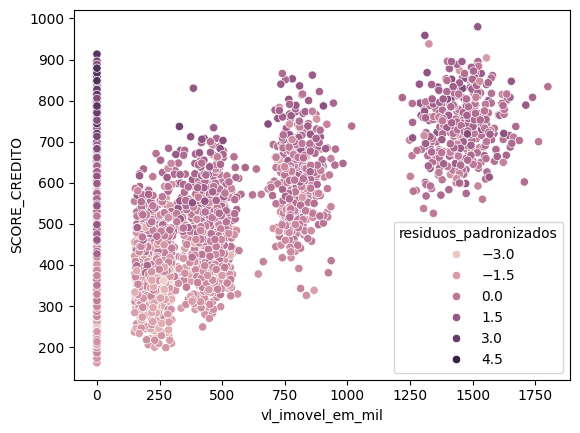

In [ ]:
sns.scatterplot(x='vl_imovel_em_mil', y='SCORE_CREDITO', data=df_c_residuos, hue='residuos_padronizados')
plt.show()

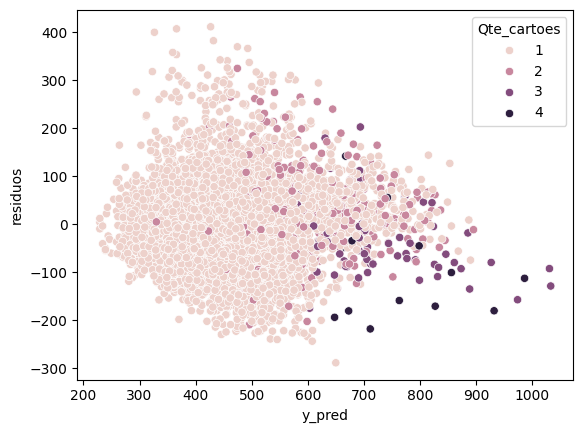

In [ ]:
sns.scatterplot(x='y_pred', y='residuos', data=df_c_residuos, hue='Qte_cartoes')
plt.show()

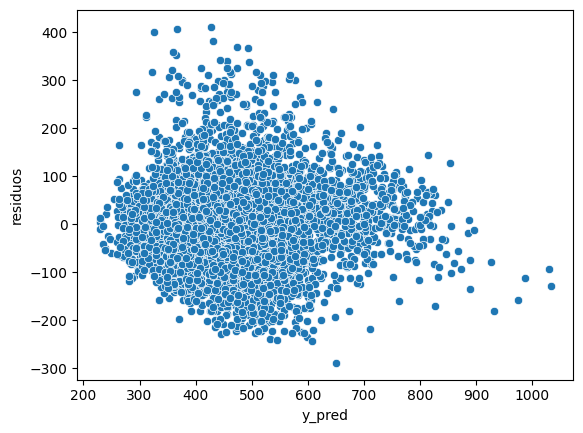

In [ ]:
sns.scatterplot(x='y_pred', y='residuos', data=df_c_residuos)
plt.show()

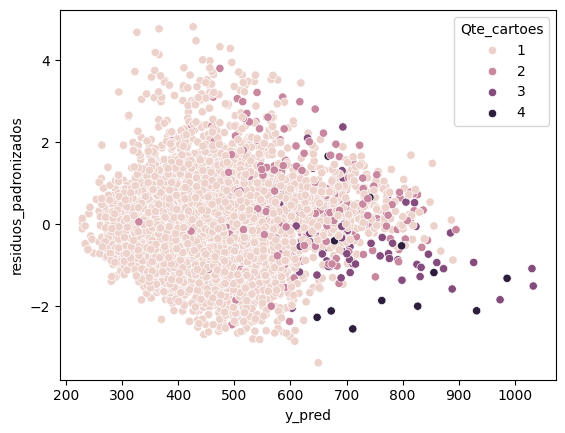

In [ ]:
sns.scatterplot(x='y_pred', y='residuos_padronizados', data=df_c_residuos, hue='Qte_cartoes')
plt.show()

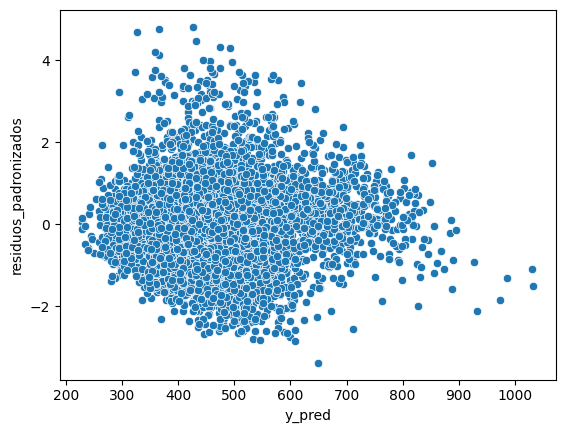

In [ ]:
sns.scatterplot(x='y_pred', y='residuos_padronizados', data=df_c_residuos)
plt.show()

Dúvida:
1. Porque o modelo está errando pra baixo em scores menores e errando pra cima em scores maiores.

#####Distribuição dos resíduos

<ipython-input-111-58d525ef065a>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,1)


Text(0.5, 0, '')

<Figure size 1000x1000 with 0 Axes>

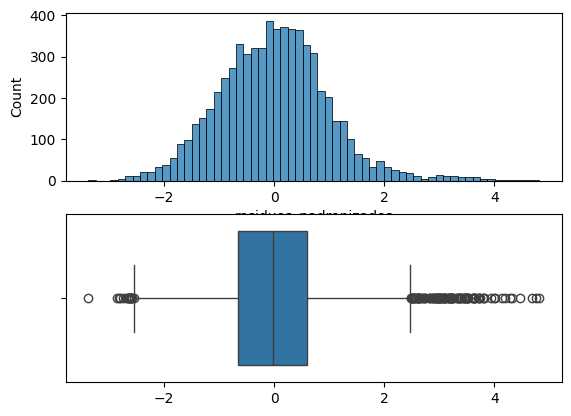

In [ ]:
plt.figure(figsize=(10,10))
fig, ax = plt.subplots()

plt.subplot(2,1,1)
sns.histplot(x=df_c_residuos['residuos_padronizados'])

plt.subplot(2,1,2)
sns.boxplot(x=df_c_residuos['residuos_padronizados'])
plt.xlabel('')

#####Teste normal

In [ ]:
from scipy.stats import normaltest

In [ ]:
significancia = 0.05

In [ ]:
stat, p_value = normaltest(df_c_residuos['residuos_padronizados'])
p_value

6.7443232397789226e-77

In [ ]:
p_value <= significancia

True

Rejeito H0. Não é normal!

####Desempenho

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
rmse1  = (np.sqrt(mean_squared_error(df_c_residuos['y_true'], df_c_residuos['y_pred']))).round(2)
rmse1

85.42

###Modelo 2

Removendo outliers modelo 1

####Outliers 1º treino

In [ ]:
outliers = df_c_residuos[(df_c_residuos['residuos_padronizados'] > 2) | (df_c_residuos['residuos_padronizados'] < -2)]
outliers

tempo_ultimoservico  vl_salario_mil  vl_imovel_em_mil  Qte_cartoes  \
28                   35.0       89.981717             224.0            1   
62                   35.0       31.674086               0.0            1   
171                  27.0       80.932304               0.0            1   
177                  32.0       89.161836               0.0            1   
208                  48.0      194.783176               0.0            1   
...                   ...             ...               ...          ...   
6449                 39.0       98.708337             269.0            1   
6475                 34.0      132.260627             152.0            1   
6486                 39.0      197.684846               0.0            1   
6505                 31.0       22.687430               0.0            1   
6561                 41.0       89.752797               0.0            1   

      Qte_carros  SCORE_CREDITO  y_true      y_pred    residuos  \
28             0          216.0   216.0  445.808471 -229.808471   
62             1          626.0   626.0  429.547126  196.452874   
171            0          583.2   583.2  365.477109  217.722891   
177            1          280.8   280.8  454.857409 -174.057409   
208            1          387.0   387.0  608.405401 -221.405401   
...          ...            ...     ...         ...         ...   
6449           1          340.0   340.0  537.428734 -197.428734   
6475           1          334.0   334.0  518.175870 -184.175870   
6486           0          683.0   683.0  506.911884  176.088116   
6505           0          518.0   518.0  344.613007  173.386993   
6561           1          787.0   787.0  500.056236  286.943764   

      residuos_padronizados  
28                -2.690037  
62                 2.299591  
171                2.548569  
177               -2.037440  
208               -2.591675  
...                     ...  
6449              -2.311014  
6475              -2.155882  
6486               2.061210  
6505               2.029592  
6561               3.358838  

[310 rows x 10 columns]

Dúvida:
1. Quem são os Outliers?

######Quem são os Outliers?

######Qte_cartoes

In [ ]:
#outliers['Qte_cartoes'].value_counts()

In [ ]:
#agrupado_outliers_1 = outliers.groupby('Qte_cartoes')['residuos_padronizados'].mean()
#agrupado_outliers_1

In [ ]:
index_outliers = outliers.index

In [ ]:
X_train_minmax_s_out = X_train_minmax.drop(index_outliers).reset_index(drop=True)
y_train_s_out = y_train.drop(index_outliers).reset_index(drop=True)

In [ ]:
X_train_minmax_s_out

tempo_ultimoservico  vl_salario_mil  vl_imovel_em_mil  Qte_cartoes  \
0                    0.30        0.090376          0.246111          0.0   
1                    0.76        0.313132          0.000000          0.0   
2                    0.34        0.488232          0.110556          0.0   
3                    0.76        0.287388          0.000000          0.0   
4                    0.54        0.097584          0.000000          0.0   
...                   ...             ...               ...          ...   
6249                 0.38        0.406019          0.000000          0.0   
6250                 0.40        0.283630          0.000000          0.0   
6251                 0.76        0.086247          0.121667          0.0   
6252                 0.54        0.100373          0.000000          0.0   
6253                 0.38        0.082109          0.000000          0.0   

      Qte_carros  
0            0.5  
1            0.5  
2            0.0  
3            0.0  
4            0.5  
...          ...  
6249         0.5  
6250         0.0  
6251         0.5  
6252         0.5  
6253         0.5  

[6254 rows x 5 columns]

####Treinamento

In [ ]:
X_train_minmax_s_out = sm.add_constant(X_train_minmax_s_out)
model = sm.OLS(y_train_s_out, X_train_minmax_s_out)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          SCORE_CREDITO   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     2719.
Date:                Tue, 17 Sep 2024   Prob (F-statistic):               0.00
Time:                        13:31:07   Log-Likelihood:                -35527.
No. Observations:                6254   AIC:                         7.107e+04
Df Residuals:                    6248   BIC:                         7.111e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 203.5775    

####Avaliação resíduos

In [ ]:
y_pred_2 = results.predict(X_train_minmax_s_out)

In [ ]:
y_pred_2

0       427.359160
1       503.637390
2       395.224141
3       436.728436
4       415.953920
           ...    
6249    423.154973
6250    346.483555
6251    504.758705
6252    416.379301
6253    373.738922
Length: 6254, dtype: float64

In [ ]:
df_c_residuos_2 = df_c_residuos.drop(index=index_outliers).reset_index(drop=True)
df_c_residuos_2.drop(columns=['SCORE_CREDITO', 'y_true', 'y_pred', 'residuos', 'residuos_padronizados'], inplace=True)

In [ ]:
df_c_residuos_2

tempo_ultimoservico  vl_salario_mil  vl_imovel_em_mil  Qte_cartoes  \
0                    22.0       21.076135             443.0            1   
1                    45.0       73.023927               0.0            1   
2                    24.0      113.858217             199.0            1   
3                    45.0       67.020314               0.0            1   
4                    34.0       22.757170               0.0            1   
...                   ...             ...               ...          ...   
6249                 26.0       94.685717               0.0            1   
6250                 27.0       66.144054               0.0            1   
6251                 45.0       20.113237             219.0            1   
6252                 34.0       23.407407               0.0            1   
6253                 26.0       19.148238               0.0            1   

      Qte_carros  
0              1  
1              1  
2              0  
3              0  
4              1  
...          ...  
6249           1  
6250           0  
6251           1  
6252           1  
6253           1  

[6254 rows x 5 columns]

In [ ]:
y_pred_2

0       427.359160
1       503.637390
2       395.224141
3       436.728436
4       415.953920
           ...    
6249    423.154973
6250    346.483555
6251    504.758705
6252    416.379301
6253    373.738922
Length: 6254, dtype: float64

In [ ]:
df_c_residuos_2['y_true'] = y_train_s_out
df_c_residuos_2['y_pred'] = y_pred_2

In [ ]:
df_c_residuos_2['residuos'] = df_c_residuos_2['y_true'] - df_c_residuos_2['y_pred']

In [ ]:
df_c_residuos_2['residuos_padronizados'] = df_c_residuos_2.residuos / df_c_residuos_2.residuos.std()
df_c_residuos_2

tempo_ultimoservico  vl_salario_mil  vl_imovel_em_mil  Qte_cartoes  \
0                    22.0       21.076135             443.0            1   
1                    45.0       73.023927               0.0            1   
2                    24.0      113.858217             199.0            1   
3                    45.0       67.020314               0.0            1   
4                    34.0       22.757170               0.0            1   
...                   ...             ...               ...          ...   
6249                 26.0       94.685717               0.0            1   
6250                 27.0       66.144054               0.0            1   
6251                 45.0       20.113237             219.0            1   
6252                 34.0       23.407407               0.0            1   
6253                 26.0       19.148238               0.0            1   

      Qte_carros  y_true      y_pred    residuos  residuos_padronizados  
0              1   378.9  427.359160  -48.459160              -0.683157  
1              1   520.2  503.637390   16.562610               0.233493  
2              0   287.0  395.224141 -108.224141              -1.525699  
3              0   335.0  436.728436 -101.728436              -1.434125  
4              1   505.0  415.953920   89.046080               1.255334  
...          ...     ...         ...         ...                    ...  
6249           1   374.0  423.154973  -49.154973              -0.692966  
6250           0   427.0  346.483555   80.516445               1.135087  
6251           1   504.9  504.758705    0.141295               0.001992  
6252           1   544.0  416.379301  127.620699               1.799143  
6253           1   329.0  373.738922  -44.738922              -0.630711  

[6254 rows x 9 columns]

In [ ]:
df_c_residuos_2

tempo_ultimoservico  vl_salario_mil  vl_imovel_em_mil  Qte_cartoes  \
0                    22.0       21.076135             443.0            1   
1                    45.0       73.023927               0.0            1   
2                    24.0      113.858217             199.0            1   
3                    45.0       67.020314               0.0            1   
4                    34.0       22.757170               0.0            1   
...                   ...             ...               ...          ...   
6249                 26.0       94.685717               0.0            1   
6250                 27.0       66.144054               0.0            1   
6251                 45.0       20.113237             219.0            1   
6252                 34.0       23.407407               0.0            1   
6253                 26.0       19.148238               0.0            1   

      Qte_carros  y_true      y_pred    residuos  residuos_padronizados  
0              1   378.9  427.359160  -48.459160              -0.683157  
1              1   520.2  503.637390   16.562610               0.233493  
2              0   287.0  395.224141 -108.224141              -1.525699  
3              0   335.0  436.728436 -101.728436              -1.434125  
4              1   505.0  415.953920   89.046080               1.255334  
...          ...     ...         ...         ...                    ...  
6249           1   374.0  423.154973  -49.154973              -0.692966  
6250           0   427.0  346.483555   80.516445               1.135087  
6251           1   504.9  504.758705    0.141295               0.001992  
6252           1   544.0  416.379301  127.620699               1.799143  
6253           1   329.0  373.738922  -44.738922              -0.630711  

[6254 rows x 9 columns]

Dúvidas:
1. Porque os resíduos são grandes para amostras com vl_imovel_em_mil = 0 e alto y_true?
2. Porque os resíduos são grandes para amostras com vl_imovel _em_mil entre 250 e 500 e baixo y_true?

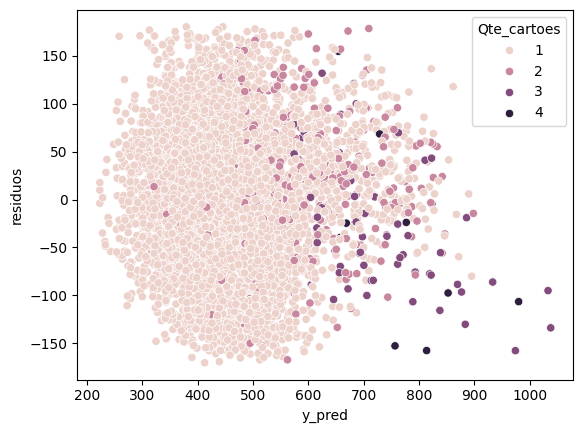

In [ ]:
sns.scatterplot(x='y_pred', y='residuos', data=df_c_residuos_2, hue='Qte_cartoes')
plt.show()

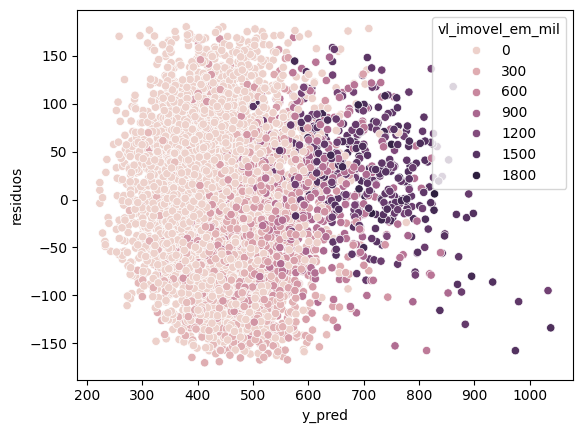

In [ ]:
sns.scatterplot(x='y_pred', y='residuos', data=df_c_residuos_2, hue='vl_imovel_em_mil')
plt.show()

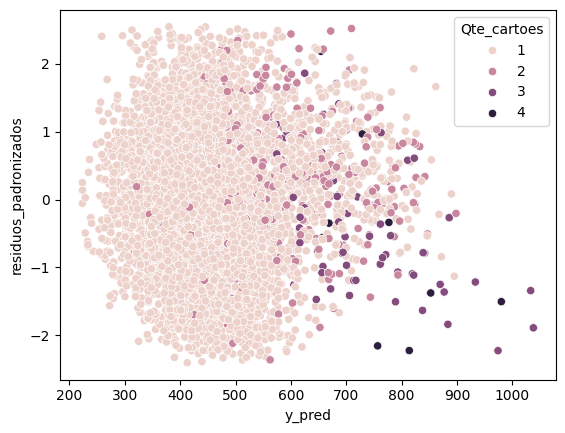

In [ ]:
sns.scatterplot(x='y_pred', y='residuos_padronizados', data=df_c_residuos_2, hue='Qte_cartoes')
plt.show()

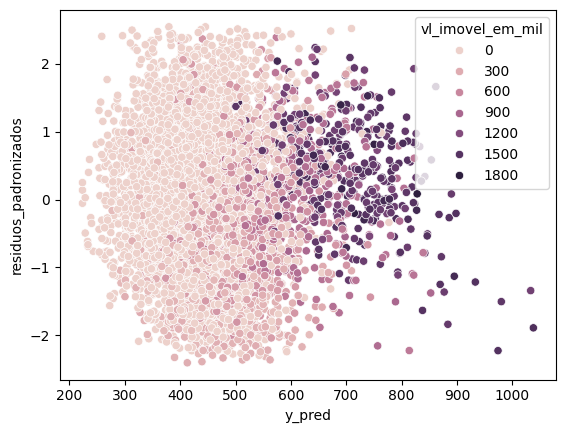

In [ ]:
sns.scatterplot(x='y_pred', y='residuos_padronizados', data=df_c_residuos_2, hue='vl_imovel_em_mil')
plt.show()

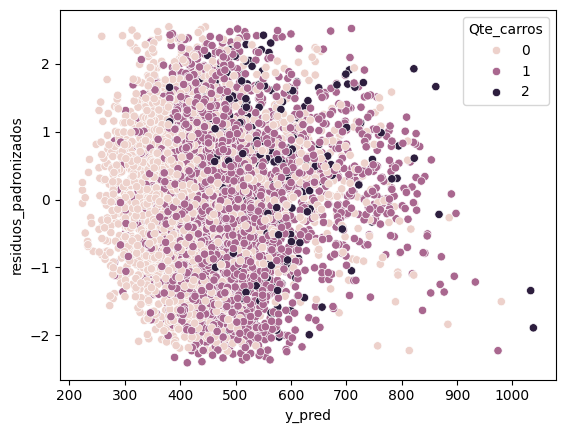

In [ ]:
sns.scatterplot(x='y_pred', y='residuos_padronizados', data=df_c_residuos_2, hue='Qte_carros')
plt.show()

In [ ]:
outliers_y_pred_alto = df_c_residuos_2[df_c_residuos_2['y_pred'] > 850]
outliers_y_pred_alto

tempo_ultimoservico  vl_salario_mil  vl_imovel_em_mil  Qte_cartoes  \
100                  50.0      229.753629            1618.0            1   
520                  40.0      110.254879            1358.0            3   
663                  38.0      217.824649            1415.0            3   
680                  35.0      221.175197            1520.0            1   
1009                 46.0      220.973970            1521.0            1   
1605                 52.0      223.746753            1438.0            1   
1706                 39.0      223.892069            1529.0            3   
1952                 45.0      222.991172            1325.0            3   
2051                 42.0      210.543095            1447.0            4   
3022                 43.0       39.404814            1506.0            3   
3885                 46.0      152.496663            1495.0            1   
4125                 48.0      121.593341            1510.0            3   
4246                 41.0      210.462622            1523.0            2   
4501                 56.0      230.658704            1399.0            1   
4874                 36.0      107.251224             877.0            4   
5305                 39.0      218.753233            1555.0            3   
6031                 48.0       92.968178            1528.0            3   

      Qte_carros  y_true       y_pred    residuos  residuos_padronizados  
100            1  815.00   895.092998  -80.092998              -1.129117  
520            1  780.30   876.850524  -96.550524              -1.361129  
663            0  753.30   883.577822 -130.277822              -1.836602  
680            2  979.65   861.745076  117.904924               1.662174  
1009           1  895.00   853.594508   41.405492               0.583717  
1605           1  812.00   871.755552  -59.755552              -0.842409  
1706           1  816.30   974.112104 -157.812104              -2.224769  
1952           2  938.00  1033.107242  -95.107242              -1.340782  
2051           0  873.44   980.050636 -106.610636              -1.502952  
3022           1  781.00   869.595960  -88.595960              -1.248989  
3885           2  852.00   867.536082  -15.536082              -0.219021  
4125           0  867.00   885.943125  -18.943125              -0.267052  
4246           1  883.74   898.223378  -14.483378              -0.204181  
4501           1  895.65   889.840546    5.809454               0.081899  
4874           1  755.00   852.559617  -97.559617              -1.375355  
5305           2  904.00  1037.974274 -133.974274              -1.888713  
6031           1  847.00   933.135324  -86.135324              -1.214300

#####Distribuição dos resíduos

<ipython-input-140-696b5eb709ac>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)


<Axes: xlabel='residuos_padronizados'>

<Figure size 1000x1000 with 0 Axes>

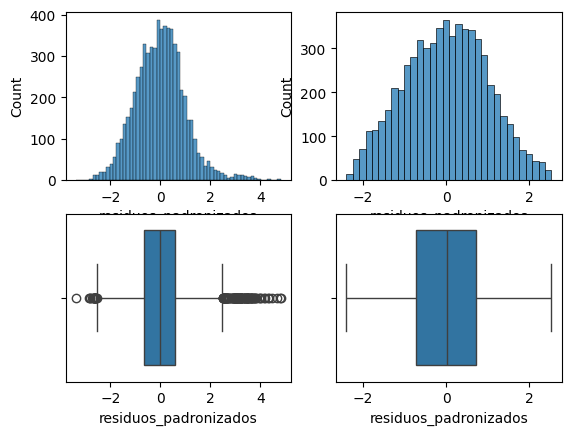

In [ ]:
plt.figure(figsize=(10,10))
fig, ax = plt.subplots()

plt.subplot(2,2,1)
sns.histplot(x=df_c_residuos['residuos_padronizados'])

plt.subplot(2,2,3)
sns.boxplot(x=df_c_residuos['residuos_padronizados'])

plt.subplot(2,2,2)
sns.histplot(x=df_c_residuos_2['residuos_padronizados'])

plt.subplot(2,2,4)
sns.boxplot(x=df_c_residuos_2['residuos_padronizados'])

#####Teste normal

In [ ]:
stat_2, p_value_2 = normaltest(df_c_residuos_2['residuos_padronizados'])
p_value_2

2.015862359514785e-32

#####Quem são os outliers 2º treino?

In [ ]:
outliers_2 = df_c_residuos_2[(df_c_residuos_2['residuos_padronizados'] > 2) | (df_c_residuos_2['residuos_padronizados'] < -2)]
outliers_2

tempo_ultimoservico  vl_salario_mil  vl_imovel_em_mil  Qte_cartoes  \
23                   43.0      102.095320               0.0            1   
36                   23.0       19.350582               0.0            1   
45                   43.0      203.849553             250.0            1   
64                   34.0       90.936586             193.0            1   
131                  50.0       25.450041               0.0            1   
...                   ...             ...               ...          ...   
6139                 43.0      201.456577               0.0            1   
6151                 34.0       62.953925             270.0            2   
6163                 34.0      123.499993             219.0            1   
6188                 41.0      127.110370             159.0            1   
6231                 35.0        0.000000             381.0            1   

      Qte_carros  y_true      y_pred    residuos  residuos_padronizados  
23             1   361.8  512.692161 -150.892161              -2.127214  
36             0   467.0  295.944586  171.055414               2.411467  
45             1   466.2  620.052499 -153.852499              -2.168948  
64             1   340.0  492.048951 -152.048951              -2.143522  
131            2   714.0  560.405134  153.594866               2.165316  
...          ...     ...         ...         ...                    ...  
6139           0   661.5  514.712113  146.787887               2.069354  
6151           1   395.0  562.395052 -167.395052              -2.359865  
6163           1   363.0  517.594209 -154.594209              -2.179404  
6188           1   386.0  545.037958 -159.037958              -2.242050  
6231           0   551.2  405.235943  145.964057               2.057740  

[239 rows x 9 columns]

####Desempenho

In [ ]:
rmse2  = (np.sqrt(mean_squared_error(df_c_residuos_2['y_true'], df_c_residuos_2['y_pred']))).round(2)
rmse2

70.93

###Modelo 3

Transformando a variável Qte_cartoes em categórica

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

In [ ]:
#Instanciar OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

#chamar make_columns_transformer
transformer = make_column_transformer(
    (encoder, ['Qte_cartoes', 'Qte_carros']),
     remainder='passthrough',
     sparse_threshold=0
)

X_train_transformed = transformer.fit_transform(X_train)


X_train_transformed = pd.DataFrame(X_train_transformed, columns=transformer.get_feature_names_out())
X_train_transformed.head()

onehotencoder__Qte_cartoes_2 onehotencoder__Qte_cartoes_3  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

  onehotencoder__Qte_cartoes_4 onehotencoder__Qte_carros_1  \
0                          0.0                         1.0   
1                          0.0                         1.0   
2                          0.0                         0.0   
3                          0.0                         0.0   
4                          0.0                         1.0   

  onehotencoder__Qte_carros_2 remainder__tempo_ultimoservico  \
0                         0.0                           22.0   
1                         0.0                           45.0   
2                         0.0                           24.0   
3                         0.0                           45.0   
4                         0.0                           34.0   

  remainder__vl_salario_mil remainder__vl_imovel_em_mil  \
0                 21.076135                       443.0   
1                 73.023927                         0.0   
2                113.858217                       199.0   
3                 67.020314                         0.0   
4                  22.75717                         0.0   

  remainder__casa_propria  
0                       1  
1                       0  
2                       1  
3                       0  
4                       0

In [ ]:
minmax_scaler = MinMaxScaler()
X_train_model_3 = minmax_scaler.fit_transform(X_train_transformed)
X_train_model_3 = pd.DataFrame(X_train_model_3, columns=X_train_transformed.columns)
X_train_model_3 = X_train_model_3.drop(columns=['remainder__casa_propria'])
X_train_model_3

onehotencoder__Qte_cartoes_2  onehotencoder__Qte_cartoes_3  \
0                              0.0                           0.0   
1                              0.0                           0.0   
2                              0.0                           0.0   
3                              0.0                           0.0   
4                              0.0                           0.0   
...                            ...                           ...   
6559                           0.0                           0.0   
6560                           0.0                           0.0   
6561                           0.0                           0.0   
6562                           0.0                           0.0   
6563                           0.0                           0.0   

      onehotencoder__Qte_cartoes_4  onehotencoder__Qte_carros_1  \
0                              0.0                          1.0   
1                              0.0                          1.0   
2                              0.0                          0.0   
3                              0.0                          0.0   
4                              0.0                          1.0   
...                            ...                          ...   
6559                           0.0                          0.0   
6560                           0.0                          1.0   
6561                           0.0                          1.0   
6562                           0.0                          1.0   
6563                           0.0                          1.0   

      onehotencoder__Qte_carros_2  remainder__tempo_ultimoservico  \
0                             0.0                            0.30   
1                             0.0                            0.76   
2                             0.0                            0.34   
3                             0.0                            0.76   
4                             0.0                            0.54   
...                           ...                             ...   
6559                          0.0                            0.40   
6560                          0.0                            0.76   
6561                          0.0                            0.68   
6562                          0.0                            0.54   
6563                          0.0                            0.38   

      remainder__vl_salario_mil  remainder__vl_imovel_em_mil  
0                      0.090376                     0.246111  
1                      0.313132                     0.000000  
2                      0.488232                     0.110556  
3                      0.287388                     0.000000  
4                      0.097584                     0.000000  
...                         ...                          ...  
6559                   0.283630                     0.000000  
6560                   0.086247                     0.121667  
6561                   0.384866                     0.000000  
6562                   0.100373                     0.000000  
6563                   0.082109                     0.000000  

[6564 rows x 8 columns]

In [ ]:
X_train_model_3 = X_train_model_3.drop(index=index_outliers).reset_index(drop=True)

####Treinamento

In [ ]:
X_train_model_3 = sm.add_constant(X_train_model_3)
model_3 = sm.OLS(y_train_s_out, X_train_model_3)
results_3 = model_3.fit()
print(results_3.summary())

                            OLS Regression Results                            
Dep. Variable:          SCORE_CREDITO   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     1735.
Date:                Tue, 17 Sep 2024   Prob (F-statistic):               0.00
Time:                        13:31:13   Log-Likelihood:                -35480.
No. Observations:                6254   AIC:                         7.098e+04
Df Residuals:                    6245   BIC:                         7.104e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

####Avaliação resíduos

In [ ]:
y_pred_3 = results_3.predict(X_train_model_3)

In [ ]:
df_c_residuos_3 = df_c_residuos_2.copy().drop(columns=['y_true', 'y_pred', 'residuos', 'residuos_padronizados'])
df_c_residuos_3

tempo_ultimoservico  vl_salario_mil  vl_imovel_em_mil  Qte_cartoes  \
0                    22.0       21.076135             443.0            1   
1                    45.0       73.023927               0.0            1   
2                    24.0      113.858217             199.0            1   
3                    45.0       67.020314               0.0            1   
4                    34.0       22.757170               0.0            1   
...                   ...             ...               ...          ...   
6249                 26.0       94.685717               0.0            1   
6250                 27.0       66.144054               0.0            1   
6251                 45.0       20.113237             219.0            1   
6252                 34.0       23.407407               0.0            1   
6253                 26.0       19.148238               0.0            1   

      Qte_carros  
0              1  
1              1  
2              0  
3              0  
4              1  
...          ...  
6249           1  
6250           0  
6251           1  
6252           1  
6253           1  

[6254 rows x 5 columns]

In [ ]:
df_c_residuos_3['y_true'] = y_train_s_out
df_c_residuos_3['y_pred'] = y_pred_3

In [ ]:
df_c_residuos_3['residuos'] = df_c_residuos_3['y_true'] - df_c_residuos_3['y_pred']

In [ ]:
df_c_residuos_3['residuos_padronizados'] = df_c_residuos_3.residuos / df_c_residuos_3.residuos.std()
df_c_residuos_3

tempo_ultimoservico  vl_salario_mil  vl_imovel_em_mil  Qte_cartoes  \
0                    22.0       21.076135             443.0            1   
1                    45.0       73.023927               0.0            1   
2                    24.0      113.858217             199.0            1   
3                    45.0       67.020314               0.0            1   
4                    34.0       22.757170               0.0            1   
...                   ...             ...               ...          ...   
6249                 26.0       94.685717               0.0            1   
6250                 27.0       66.144054               0.0            1   
6251                 45.0       20.113237             219.0            1   
6252                 34.0       23.407407               0.0            1   
6253                 26.0       19.148238               0.0            1   

      Qte_carros  y_true      y_pred    residuos  residuos_padronizados  
0              1   378.9  423.100914  -44.200914              -0.627741  
1              1   520.2  498.410136   21.789864               0.309459  
2              0   287.0  397.521423 -110.521423              -1.569623  
3              0   335.0  438.499244 -103.499244              -1.469895  
4              1   505.0  411.187506   93.812494               1.332323  
...          ...     ...         ...         ...                    ...  
6249           1   374.0  418.399187  -44.399187              -0.630557  
6250           0   427.0  348.765026   78.234974               1.111092  
6251           1   504.9  499.771024    5.128976               0.072842  
6252           1   544.0  411.610941  132.389059               1.880187  
6253           1   329.0  369.209100  -40.209100              -0.571049  

[6254 rows x 9 columns]

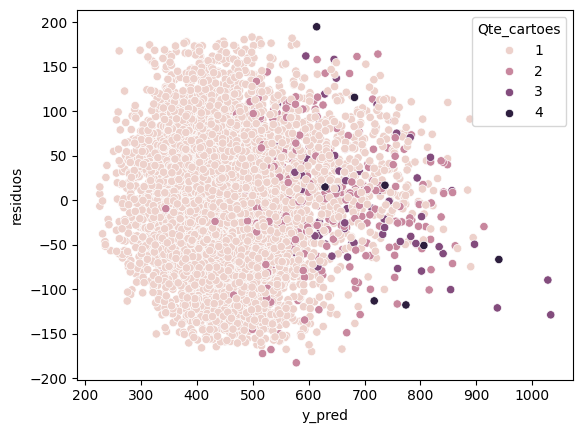

In [ ]:
sns.scatterplot(x='y_pred', y='residuos', data=df_c_residuos_3, hue='Qte_cartoes')
plt.show()

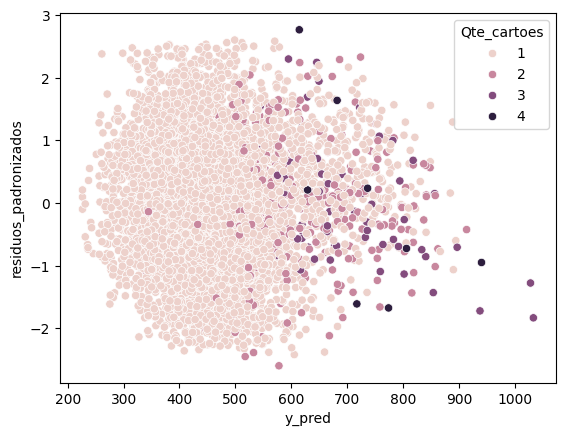

In [ ]:
sns.scatterplot(x='y_pred', y='residuos_padronizados', data=df_c_residuos_3, hue='Qte_cartoes')
plt.show()

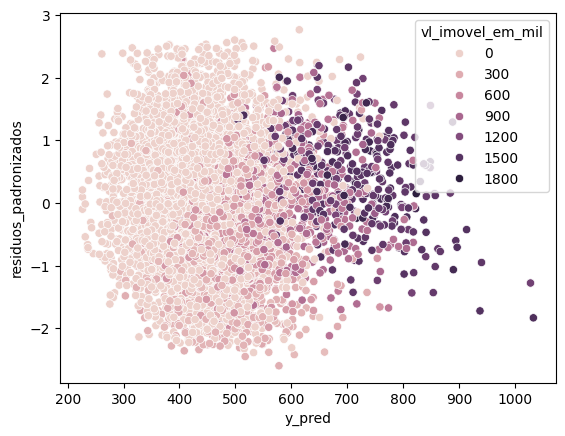

In [ ]:
sns.scatterplot(x='y_pred', y='residuos_padronizados', data=df_c_residuos_3, hue='vl_imovel_em_mil')
plt.show()

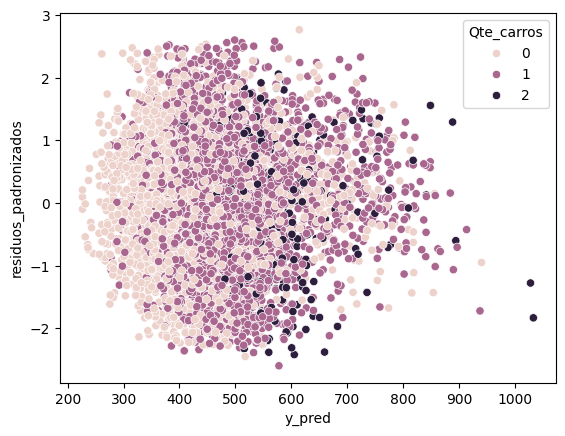

In [ ]:
sns.scatterplot(x='y_pred', y='residuos_padronizados', data=df_c_residuos_3, hue='Qte_carros')
plt.show()

In [ ]:
stat_3, p_value_3 = normaltest(df_c_residuos_3['residuos_padronizados'])
p_value_3

1.6743133115526333e-29

####Desempenho

In [ ]:
rmse3  = (np.sqrt(mean_squared_error(df_c_residuos_3['y_true'], df_c_residuos_3['y_pred']))).round(2)
rmse3

70.41

###Modelo 4

O modelo quatro terá variável(is) quantitativa(s) em qualitativa(s)

1. sem outliers modelo 1
2. com outliers modelo 1 ---> atual

####Cálculo número de classes

In [ ]:
n = len(df_c_residuos_3)
n

6254

In [ ]:
K = round(1 + np.log2(n))
K

14

In [ ]:
intervalo_vl_imovel = round((df_c_residuos_3['vl_imovel_em_mil'].max() - df_c_residuos_3['vl_imovel_em_mil'].min()) / K)
intervalo_vl_imovel

129

####Transformações variáveis quantitativas para qualitativas

In [ ]:
df_c_residuos

tempo_ultimoservico  vl_salario_mil  vl_imovel_em_mil  Qte_cartoes  \
0                    22.0       21.076135             443.0            1   
1                    45.0       73.023927               0.0            1   
2                    24.0      113.858217             199.0            1   
3                    45.0       67.020314               0.0            1   
4                    34.0       22.757170               0.0            1   
...                   ...             ...               ...          ...   
6559                 27.0       66.144054               0.0            1   
6560                 45.0       20.113237             219.0            1   
6561                 41.0       89.752797               0.0            1   
6562                 34.0       23.407407               0.0            1   
6563                 26.0       19.148238               0.0            1   

      Qte_carros  SCORE_CREDITO  y_true      y_pred    residuos  \
0              1          378.9   378.9  425.052539  -46.152539   
1              1          520.2   520.2  508.251352   11.948648   
2              0          287.0   287.0  403.967792 -116.967792   
3              0          335.0   335.0  445.309746 -110.309746   
4              1          505.0   505.0  418.329580   86.670420   
...          ...            ...     ...         ...         ...   
6559           0          427.0   427.0  355.126041   71.873959   
6560           1          504.9   504.9  504.641423    0.258577   
6561           1          787.0   787.0  500.056236  286.943764   
6562           1          544.0   544.0  418.784715  125.215285   
6563           1          329.0   329.0  375.994449  -46.994449   

      residuos_padronizados  
0                 -0.540241  
1                  0.139866  
2                 -1.369174  
3                 -1.291238  
4                  1.014526  
...                     ...  
6559               0.841325  
6560               0.003027  
6561               3.358838  
6562               1.465715  
6563              -0.550096  

[6564 rows x 10 columns]

In [ ]:
X_train_transformed_modelo_4 = df_c_residuos.copy()
X_train_transformed_modelo_4.drop(columns=['y_true', 'y_pred', 'residuos', 'residuos_padronizados'], inplace=True)

In [ ]:
X_train_transformed_modelo_4['fx_vl_imovel'] = pd.cut(X_train_transformed_modelo_4['vl_imovel_em_mil'], bins=K, labels=False)
X_train_transformed_modelo_4.drop(columns=['vl_imovel_em_mil'], inplace=True)

In [ ]:
X_train_transformed_modelo_4['fx_tempo_servico'] = pd.cut(X_train_transformed_modelo_4['tempo_ultimoservico'], bins=K, labels=False)
X_train_transformed_modelo_4.drop(columns=['tempo_ultimoservico'], inplace=True)

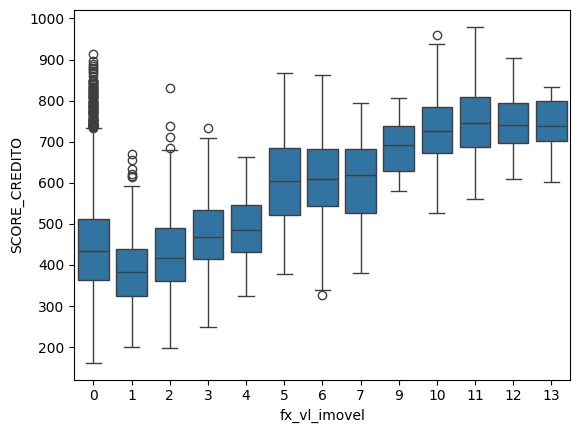

In [ ]:
sns.boxplot(x='fx_vl_imovel', y='SCORE_CREDITO', data=X_train_transformed_modelo_4)
plt.show()

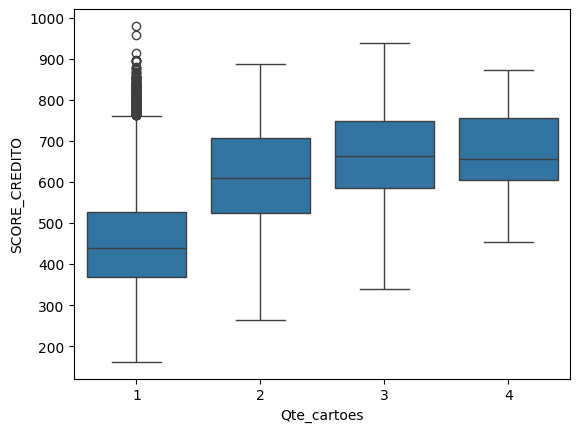

In [ ]:
sns.boxplot(x='Qte_cartoes', y='SCORE_CREDITO', data=X_train_transformed_modelo_4)
plt.show()

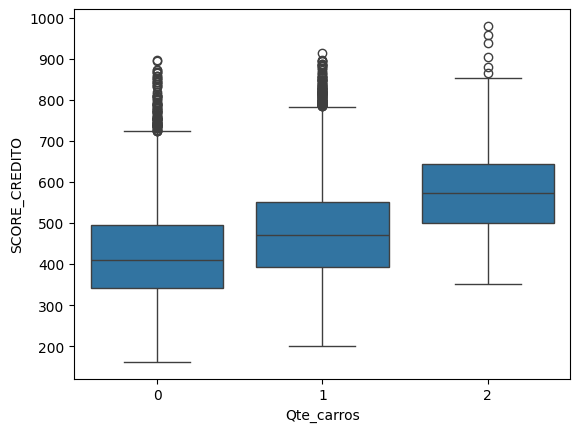

In [ ]:
sns.boxplot(x='Qte_carros', y='SCORE_CREDITO', data=X_train_transformed_modelo_4)
plt.show()

In [ ]:
X_train_transformed_modelo_4.drop(columns=['SCORE_CREDITO'], inplace=True)

In [ ]:
X_train_transformed_modelo_4

vl_salario_mil  Qte_cartoes  Qte_carros  fx_vl_imovel  fx_tempo_servico
0          21.076135            1           1             3                 4
1          73.023927            1           1             0                10
2         113.858217            1           0             1                 4
3          67.020314            1           0             0                10
4          22.757170            1           1             0                 7
...              ...          ...         ...           ...               ...
6559       66.144054            1           0             0                 5
6560       20.113237            1           1             1                10
6561       89.752797            1           1             0                 9
6562       23.407407            1           1             0                 7
6563       19.148238            1           1             0                 5

[6564 rows x 5 columns]

In [ ]:
#Instanciar OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

#chamar make_columns_transformer
transformer_2 = make_column_transformer(
    (encoder, ['Qte_cartoes', 'Qte_carros', 'fx_vl_imovel']),
     remainder='passthrough',
     sparse_threshold=0
)

X_train_transformed_modelo_4 = transformer_2.fit_transform(X_train_transformed_modelo_4)


X_train_transformed_modelo_4 = pd.DataFrame(X_train_transformed_modelo_4, columns=transformer_2.get_feature_names_out())
X_train_transformed_modelo_4.head()

onehotencoder__Qte_cartoes_2  onehotencoder__Qte_cartoes_3  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   
3                           0.0                           0.0   
4                           0.0                           0.0   

   onehotencoder__Qte_cartoes_4  onehotencoder__Qte_carros_1  \
0                           0.0                          1.0   
1                           0.0                          1.0   
2                           0.0                          0.0   
3                           0.0                          0.0   
4                           0.0                          1.0   

   onehotencoder__Qte_carros_2  onehotencoder__fx_vl_imovel_1  \
0                          0.0                            0.0   
1                          0.0                            0.0   
2                          0.0                            1.0   
3                          0.0                            0.0   
4                          0.0                            0.0   

   onehotencoder__fx_vl_imovel_2  onehotencoder__fx_vl_imovel_3  \
0                            0.0                            1.0   
1                            0.0                            0.0   
2                            0.0                            0.0   
3                            0.0                            0.0   
4                            0.0                            0.0   

   onehotencoder__fx_vl_imovel_4  onehotencoder__fx_vl_imovel_5  \
0                            0.0                            0.0   
1                            0.0                            0.0   
2                            0.0                            0.0   
3                            0.0                            0.0   
4                            0.0                            0.0   

   onehotencoder__fx_vl_imovel_6  onehotencoder__fx_vl_imovel_7  \
0                            0.0                            0.0   
1                            0.0                            0.0   
2                            0.0                            0.0   
3                            0.0                            0.0   
4                            0.0                            0.0   

   onehotencoder__fx_vl_imovel_9  onehotencoder__fx_vl_imovel_10  \
0                            0.0                             0.0   
1                            0.0                             0.0   
2                            0.0                             0.0   
3                            0.0                             0.0   
4                            0.0                             0.0   

   onehotencoder__fx_vl_imovel_11  onehotencoder__fx_vl_imovel_12  \
0                             0.0                             0.0   
1                             0.0                             0.0   
2                             0.0                             0.0   
3                             0.0                             0.0   
4                             0.0                             0.0   

   onehotencoder__fx_vl_imovel_13  remainder__vl_salario_mil  \
0                             0.0                  21.076135   
1                             0.0                  73.023927   
2                             0.0                 113.858217   
3                             0.0                  67.020314   
4                             0.0                  22.757170   

   remainder__fx_tempo_servico  
0                          4.0  
1                         10.0  
2                          4.0  
3                         10.0  
4                          7.0

In [ ]:
X_train_model_4 = scaler.fit_transform(X_train_transformed_modelo_4)
X_train_model_4 = pd.DataFrame(X_train_model_4, columns=X_train_transformed_modelo_4.columns)
X_train_model_4

onehotencoder__Qte_cartoes_2  onehotencoder__Qte_cartoes_3  \
0                              0.0                           0.0   
1                              0.0                           0.0   
2                              0.0                           0.0   
3                              0.0                           0.0   
4                              0.0                           0.0   
...                            ...                           ...   
6559                           0.0                           0.0   
6560                           0.0                           0.0   
6561                           0.0                           0.0   
6562                           0.0                           0.0   
6563                           0.0                           0.0   

      onehotencoder__Qte_cartoes_4  onehotencoder__Qte_carros_1  \
0                              0.0                          1.0   
1                              0.0                          1.0   
2                              0.0                          0.0   
3                              0.0                          0.0   
4                              0.0                          1.0   
...                            ...                          ...   
6559                           0.0                          0.0   
6560                           0.0                          1.0   
6561                           0.0                          1.0   
6562                           0.0                          1.0   
6563                           0.0                          1.0   

      onehotencoder__Qte_carros_2  onehotencoder__fx_vl_imovel_1  \
0                             0.0                            0.0   
1                             0.0                            0.0   
2                             0.0                            1.0   
3                             0.0                            0.0   
4                             0.0                            0.0   
...                           ...                            ...   
6559                          0.0                            0.0   
6560                          0.0                            1.0   
6561                          0.0                            0.0   
6562                          0.0                            0.0   
6563                          0.0                            0.0   

      onehotencoder__fx_vl_imovel_2  onehotencoder__fx_vl_imovel_3  \
0                               0.0                            1.0   
1                               0.0                            0.0   
2                               0.0                            0.0   
3                               0.0                            0.0   
4                               0.0                            0.0   
...                             ...                            ...   
6559                            0.0                            0.0   
6560                            0.0                            0.0   
6561                            0.0                            0.0   
6562                            0.0                            0.0   
6563                            0.0                            0.0   

      onehotencoder__fx_vl_imovel_4  onehotencoder__fx_vl_imovel_5  \
0                               0.0                            0.0   
1                               0.0                            0.0   
2                               0.0                            0.0   
3                               0.0                            0.0   
4                               0.0                            0.0   
...                             ...                            ...   
6559                            0.0                            0.0   
6560                            0.0                            0.0   
6561                            0.0                            0.0   
6562                      

####Treinamento

In [ ]:
X_train_model_4 = sm.add_constant(X_train_model_4)
model_4 = sm.OLS(y_train, X_train_model_4)
results_4 = model_4.fit()
print(results_4.summary())

                            OLS Regression Results                            
Dep. Variable:          SCORE_CREDITO   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     625.9
Date:                Tue, 17 Sep 2024   Prob (F-statistic):               0.00
Time:                        13:31:17   Log-Likelihood:                -38005.
No. Observations:                6564   AIC:                         7.605e+04
Df Residuals:                    6544   BIC:                         7.619e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

####Avaliação resíduos

In [ ]:
y_pred_4 = results_4.predict(X_train_model_4)

In [ ]:
df_c_residuos_4 = df_c_residuos_3.copy()

In [ ]:
df_c_residuos_4['y_true'] = y_train_s_out
df_c_residuos_4['y_pred'] = y_pred_4

In [ ]:
df_c_residuos_4['residuos'] = df_c_residuos_4['y_true'] - df_c_residuos_4['y_pred']

In [ ]:
df_c_residuos_4['residuos_padronizados'] = df_c_residuos_4.residuos / df_c_residuos_4.residuos.std()
df_c_residuos_4

tempo_ultimoservico  vl_salario_mil  vl_imovel_em_mil  Qte_cartoes  \
0                    22.0       21.076135             443.0            1   
1                    45.0       73.023927               0.0            1   
2                    24.0      113.858217             199.0            1   
3                    45.0       67.020314               0.0            1   
4                    34.0       22.757170               0.0            1   
...                   ...             ...               ...          ...   
6249                 26.0       94.685717               0.0            1   
6250                 27.0       66.144054               0.0            1   
6251                 45.0       20.113237             219.0            1   
6252                 34.0       23.407407               0.0            1   
6253                 26.0       19.148238               0.0            1   

      Qte_carros  y_true      y_pred    residuos  residuos_padronizados  
0              1   378.9  412.013934  -33.113934              -0.200683  
1              1   520.2  514.303348    5.896652               0.035736  
2              0   287.0  321.364857  -34.364857              -0.208264  
3              0   335.0  456.433412 -121.433412              -0.735931  
4              1   505.0  428.618562   76.381438               0.462900  
...          ...     ...         ...         ...                    ...  
6249           1   374.0  521.431046 -147.431046              -0.893487  
6250           0   427.0  720.505869 -293.505869              -1.778754  
6251           1   504.9  827.332064 -322.432064              -1.954058  
6252           1   544.0  391.622299  152.377701               0.923465  
6253           1   329.0  477.988703 -148.988703              -0.902927  

[6254 rows x 9 columns]

#####Resíduos padronizados

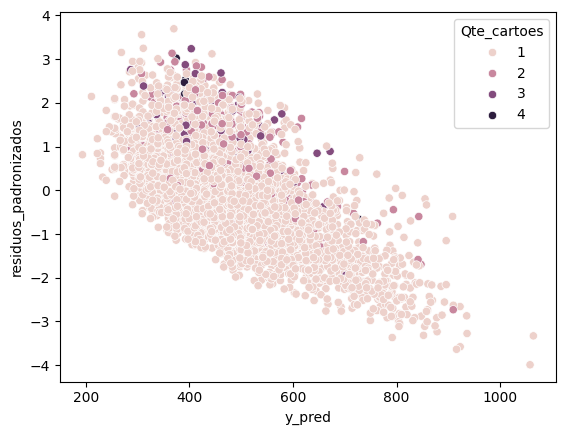

In [ ]:
sns.scatterplot(x='y_pred', y='residuos_padronizados', data=df_c_residuos_4, hue='Qte_cartoes')
plt.show()

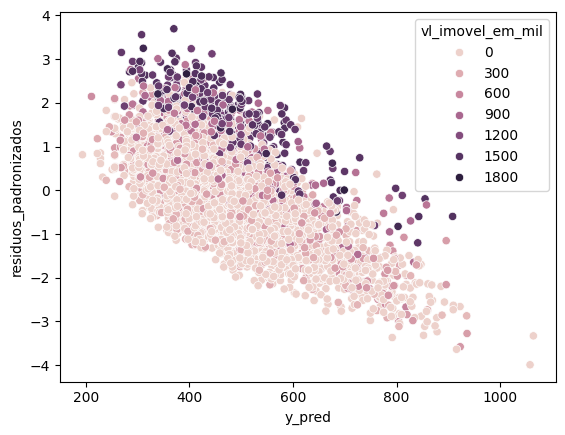

In [ ]:
sns.scatterplot(x='y_pred', y='residuos_padronizados', data=df_c_residuos_4, hue='vl_imovel_em_mil')
plt.show()

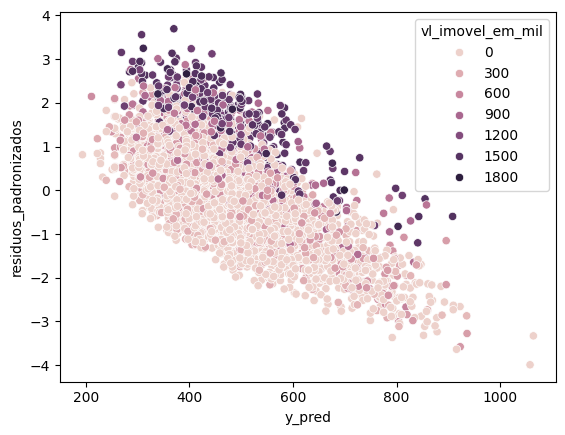

In [ ]:
sns.scatterplot(x='y_pred', y='residuos_padronizados', data=df_c_residuos_4, hue='vl_imovel_em_mil')
plt.show()

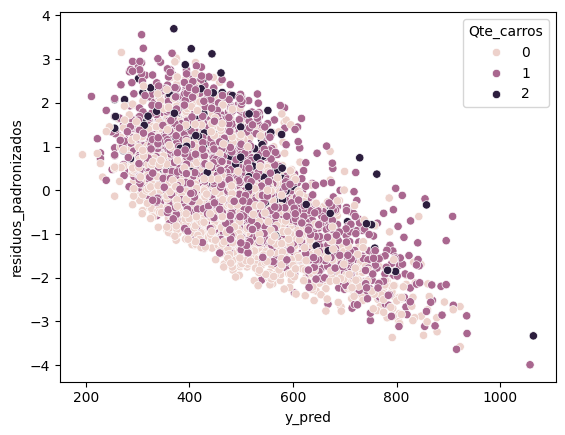

In [ ]:
sns.scatterplot(x='y_pred', y='residuos_padronizados', data=df_c_residuos_4, hue='Qte_carros')
plt.show()

#####Distribuição e boxplot

<ipython-input-184-19f94a052785>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,1)


Text(0.5, 0, '')

<Figure size 1000x1000 with 0 Axes>

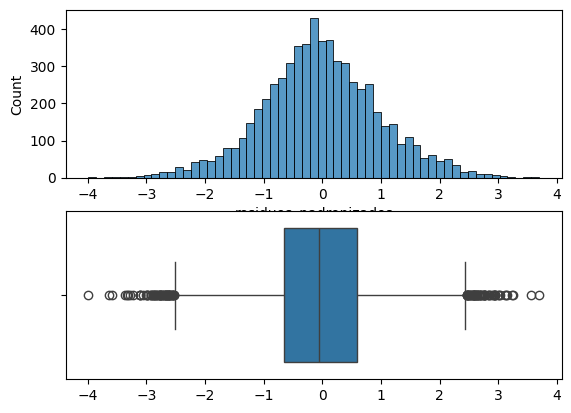

In [ ]:
plt.figure(figsize=(10,10))
fig, ax = plt.subplots()

plt.subplot(2,1,1)
sns.histplot(x=df_c_residuos_4['residuos_padronizados'])

plt.subplot(2,1,2)
sns.boxplot(x=df_c_residuos_4['residuos_padronizados'])
plt.xlabel('')

#####QQ plot

<ipython-input-185-fcde997b21cd>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuos4,ax=ax[0][1])


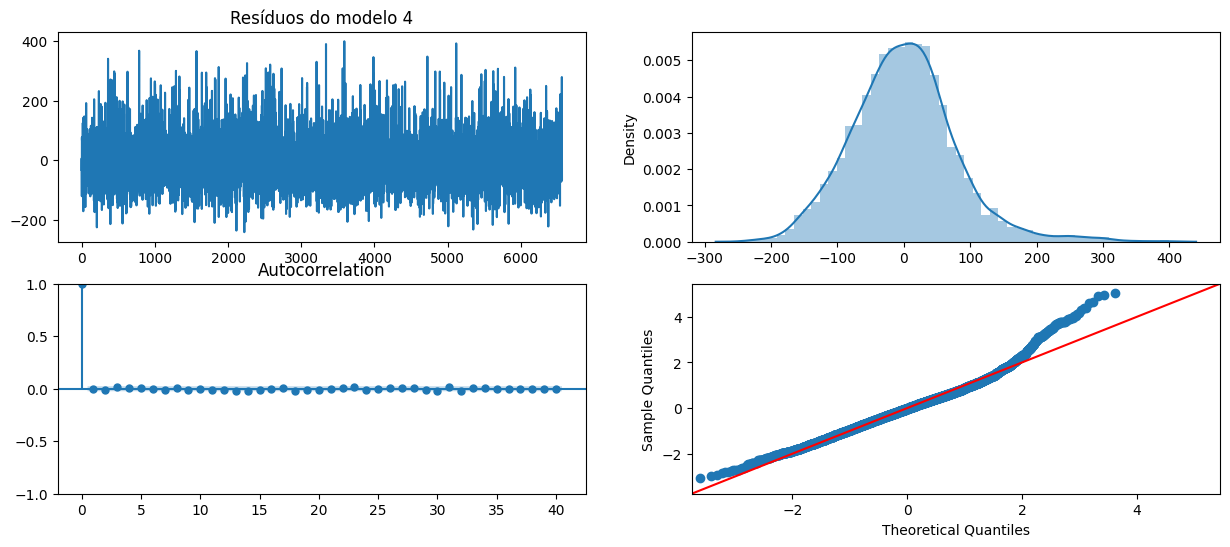

In [ ]:
from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.tsaplots import plot_acf
from scipy import stats

residuos4 = results_4.resid
fig, ax = plt.subplots(2,2,figsize=(15,6))
residuos4.plot(title="Resíduos do modelo 4", ax=ax[0][0])
sns.distplot(residuos4,ax=ax[0][1])
plot_acf(residuos4,lags=40, ax=ax[1][0])
qqplot(residuos4, stats.norm, fit=True, line="45", ax=ax[1][1]);

####Desempenho

In [ ]:
rmse4  = (np.sqrt(mean_squared_error(df_c_residuos_4['y_true'], df_c_residuos_4['y_pred']))).round(2)
rmse4

165.08

###Modelo 5

Remover Outliers modelo 4

In [ ]:
outliers_4 = df_c_residuos[(df_c_residuos['residuos_padronizados'] > 2) | (df_c_residuos['residuos_padronizados'] < -2)]
outliers_4

tempo_ultimoservico  vl_salario_mil  vl_imovel_em_mil  Qte_cartoes  \
28                   35.0       89.981717             224.0            1   
62                   35.0       31.674086               0.0            1   
171                  27.0       80.932304               0.0            1   
177                  32.0       89.161836               0.0            1   
208                  48.0      194.783176               0.0            1   
...                   ...             ...               ...          ...   
6449                 39.0       98.708337             269.0            1   
6475                 34.0      132.260627             152.0            1   
6486                 39.0      197.684846               0.0            1   
6505                 31.0       22.687430               0.0            1   
6561                 41.0       89.752797               0.0            1   

      Qte_carros  SCORE_CREDITO  y_true      y_pred    residuos  \
28             0          216.0   216.0  445.808471 -229.808471   
62             1          626.0   626.0  429.547126  196.452874   
171            0          583.2   583.2  365.477109  217.722891   
177            1          280.8   280.8  454.857409 -174.057409   
208            1          387.0   387.0  608.405401 -221.405401   
...          ...            ...     ...         ...         ...   
6449           1          340.0   340.0  537.428734 -197.428734   
6475           1          334.0   334.0  518.175870 -184.175870   
6486           0          683.0   683.0  506.911884  176.088116   
6505           0          518.0   518.0  344.613007  173.386993   
6561           1          787.0   787.0  500.056236  286.943764   

      residuos_padronizados  
28                -2.690037  
62                 2.299591  
171                2.548569  
177               -2.037440  
208               -2.591675  
...                     ...  
6449              -2.311014  
6475              -2.155882  
6486               2.061210  
6505               2.029592  
6561               3.358838  

[310 rows x 10 columns]

In [ ]:
to_remove_5 = outliers_4.index

In [ ]:
X_train_transformed_modelo_5 = df_c_residuos.copy()
X_train_transformed_modelo_5.drop(columns=['y_true', 'y_pred', 'residuos', 'residuos_padronizados'], inplace=True)

In [ ]:
X_train_transformed_modelo_5['fx_vl_imovel'] = pd.cut(X_train_transformed_modelo_5['vl_imovel_em_mil'], bins=K, labels=False)
X_train_transformed_modelo_5.drop(columns=['vl_imovel_em_mil'], inplace=True)

In [ ]:
#X_train_transformed_modelo_5['fx_tempo_servico'] = pd.cut(X_train_transformed_modelo_5['tempo_ultimoservico'], bins=K, labels=False)
#X_train_transformed_modelo_5.drop(columns=['tempo_ultimoservico'], inplace=True)

In [ ]:
X_train_transformed_modelo_5

tempo_ultimoservico  vl_salario_mil  Qte_cartoes  Qte_carros  \
0                    22.0       21.076135            1           1   
1                    45.0       73.023927            1           1   
2                    24.0      113.858217            1           0   
3                    45.0       67.020314            1           0   
4                    34.0       22.757170            1           1   
...                   ...             ...          ...         ...   
6559                 27.0       66.144054            1           0   
6560                 45.0       20.113237            1           1   
6561                 41.0       89.752797            1           1   
6562                 34.0       23.407407            1           1   
6563                 26.0       19.148238            1           1   

      SCORE_CREDITO  fx_vl_imovel  
0             378.9             3  
1             520.2             0  
2             287.0             1  
3             335.0             0  
4             505.0             0  
...             ...           ...  
6559          427.0             0  
6560          504.9             1  
6561          787.0             0  
6562          544.0             0  
6563          329.0             0  

[6564 rows x 6 columns]

In [ ]:
X_train_transformed_modelo_5 = X_train_transformed_modelo_5.drop(index=to_remove_5).reset_index(drop=True)
y_train_model_5 = y_train.drop(index=to_remove_5).reset_index(drop=True)

In [ ]:
X_train_transformed_modelo_5.drop(columns=['SCORE_CREDITO'], inplace=True)

In [ ]:
#Instanciar OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

#chamar make_columns_transformer
transformer_3 = make_column_transformer(
    (encoder, ['Qte_cartoes', 'Qte_carros', 'fx_vl_imovel']),
     remainder='passthrough',
     sparse_threshold=0
)

X_train_transformed_modelo_5 = transformer_3.fit_transform(X_train_transformed_modelo_5)


X_train_transformed_modelo_5 = pd.DataFrame(X_train_transformed_modelo_5, columns=transformer_3.get_feature_names_out())
X_train_transformed_modelo_5

onehotencoder__Qte_cartoes_2  onehotencoder__Qte_cartoes_3  \
0                              0.0                           0.0   
1                              0.0                           0.0   
2                              0.0                           0.0   
3                              0.0                           0.0   
4                              0.0                           0.0   
...                            ...                           ...   
6249                           0.0                           0.0   
6250                           0.0                           0.0   
6251                           0.0                           0.0   
6252                           0.0                           0.0   
6253                           0.0                           0.0   

      onehotencoder__Qte_cartoes_4  onehotencoder__Qte_carros_1  \
0                              0.0                          1.0   
1                              0.0                          1.0   
2                              0.0                          0.0   
3                              0.0                          0.0   
4                              0.0                          1.0   
...                            ...                          ...   
6249                           0.0                          1.0   
6250                           0.0                          0.0   
6251                           0.0                          1.0   
6252                           0.0                          1.0   
6253                           0.0                          1.0   

      onehotencoder__Qte_carros_2  onehotencoder__fx_vl_imovel_1  \
0                             0.0                            0.0   
1                             0.0                            0.0   
2                             0.0                            1.0   
3                             0.0                            0.0   
4                             0.0                            0.0   
...                           ...                            ...   
6249                          0.0                            0.0   
6250                          0.0                            0.0   
6251                          0.0                            1.0   
6252                          0.0                            0.0   
6253                          0.0                            0.0   

      onehotencoder__fx_vl_imovel_2  onehotencoder__fx_vl_imovel_3  \
0                               0.0                            1.0   
1                               0.0                            0.0   
2                               0.0                            0.0   
3                               0.0                            0.0   
4                               0.0                            0.0   
...                             ...                            ...   
6249                            0.0                            0.0   
6250                            0.0                            0.0   
6251                            0.0                            0.0   
6252                            0.0                            0.0   
6253                            0.0                            0.0   

      onehotencoder__fx_vl_imovel_4  onehotencoder__fx_vl_imovel_5  \
0                               0.0                            0.0   
1                               0.0                            0.0   
2                               0.0                            0.0   
3                               0.0                            0.0   
4                               0.0                            0.0   
...                             ...                            ...   
6249                            0.0                            0.0   
6250                            0.0                            0.0   
6251                            0.0                            0.0   
6252                      

In [ ]:
X_train_model_5 = scaler.fit_transform(X_train_transformed_modelo_5)
X_train_model_5 = pd.DataFrame(X_train_model_5, columns=X_train_transformed_modelo_5.columns)
X_train_model_5

onehotencoder__Qte_cartoes_2  onehotencoder__Qte_cartoes_3  \
0                              0.0                           0.0   
1                              0.0                           0.0   
2                              0.0                           0.0   
3                              0.0                           0.0   
4                              0.0                           0.0   
...                            ...                           ...   
6249                           0.0                           0.0   
6250                           0.0                           0.0   
6251                           0.0                           0.0   
6252                           0.0                           0.0   
6253                           0.0                           0.0   

      onehotencoder__Qte_cartoes_4  onehotencoder__Qte_carros_1  \
0                              0.0                          1.0   
1                              0.0                          1.0   
2                              0.0                          0.0   
3                              0.0                          0.0   
4                              0.0                          1.0   
...                            ...                          ...   
6249                           0.0                          1.0   
6250                           0.0                          0.0   
6251                           0.0                          1.0   
6252                           0.0                          1.0   
6253                           0.0                          1.0   

      onehotencoder__Qte_carros_2  onehotencoder__fx_vl_imovel_1  \
0                             0.0                            0.0   
1                             0.0                            0.0   
2                             0.0                            1.0   
3                             0.0                            0.0   
4                             0.0                            0.0   
...                           ...                            ...   
6249                          0.0                            0.0   
6250                          0.0                            0.0   
6251                          0.0                            1.0   
6252                          0.0                            0.0   
6253                          0.0                            0.0   

      onehotencoder__fx_vl_imovel_2  onehotencoder__fx_vl_imovel_3  \
0                               0.0                            1.0   
1                               0.0                            0.0   
2                               0.0                            0.0   
3                               0.0                            0.0   
4                               0.0                            0.0   
...                             ...                            ...   
6249                            0.0                            0.0   
6250                            0.0                            0.0   
6251                            0.0                            0.0   
6252                            0.0                            0.0   
6253                            0.0                            0.0   

      onehotencoder__fx_vl_imovel_4  onehotencoder__fx_vl_imovel_5  \
0                               0.0                            0.0   
1                               0.0                            0.0   
2                               0.0                            0.0   
3                               0.0                            0.0   
4                               0.0                            0.0   
...                             ...                            ...   
6249                            0.0                            0.0   
6250                            0.0                            0.0   
6251                            0.0                            0.0   
6252                      

In [ ]:
X_train_model_5 = sm.add_constant(X_train_model_5)
model_5 = sm.OLS(y_train_model_5, X_train_model_5)
results_5 = model_5.fit()
print(results_5.summary())

                            OLS Regression Results                            
Dep. Variable:          SCORE_CREDITO   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     871.5
Date:                Tue, 17 Sep 2024   Prob (F-statistic):               0.00
Time:                        13:31:22   Log-Likelihood:                -35086.
No. Observations:                6254   AIC:                         7.021e+04
Df Residuals:                    6234   BIC:                         7.035e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [ ]:
y_pred_5 = results_5.predict(X_train_model_5)

In [ ]:
y_pred_5

0       409.602808
1       510.441118
2       331.393252
3       447.635788
4       425.150151
           ...    
6249    430.738724
6250    358.791123
6251    435.041188
6252    425.555438
6253    383.656961
Length: 6254, dtype: float64

In [ ]:
df_c_residuos_5 = df_c_residuos.drop(columns=['y_true', 'y_pred', 'residuos', 'residuos_padronizados']).copy()
df_c_residuos_5.drop(index=to_remove_5, inplace=True)
df_c_residuos_5.reset_index(drop=True, inplace=True)

In [ ]:
df_c_residuos_5

tempo_ultimoservico  vl_salario_mil  vl_imovel_em_mil  Qte_cartoes  \
0                    22.0       21.076135             443.0            1   
1                    45.0       73.023927               0.0            1   
2                    24.0      113.858217             199.0            1   
3                    45.0       67.020314               0.0            1   
4                    34.0       22.757170               0.0            1   
...                   ...             ...               ...          ...   
6249                 26.0       94.685717               0.0            1   
6250                 27.0       66.144054               0.0            1   
6251                 45.0       20.113237             219.0            1   
6252                 34.0       23.407407               0.0            1   
6253                 26.0       19.148238               0.0            1   

      Qte_carros  SCORE_CREDITO  
0              1          378.9  
1              1          520.2  
2              0          287.0  
3              0          335.0  
4              1          505.0  
...          ...            ...  
6249           1          374.0  
6250           0          427.0  
6251           1          504.9  
6252           1          544.0  
6253           1          329.0  

[6254 rows x 6 columns]

In [ ]:
df_c_residuos_5['y_true'] = y_train_model_5
df_c_residuos_5['y_pred'] = y_pred_5

In [ ]:
df_c_residuos_5['residuos'] = df_c_residuos_5['y_true'] - df_c_residuos_5['y_pred']

In [ ]:
df_c_residuos_5['residuos_padronizados'] = df_c_residuos_5.residuos / df_c_residuos_5.residuos.std()
df_c_residuos_5

tempo_ultimoservico  vl_salario_mil  vl_imovel_em_mil  Qte_cartoes  \
0                    22.0       21.076135             443.0            1   
1                    45.0       73.023927               0.0            1   
2                    24.0      113.858217             199.0            1   
3                    45.0       67.020314               0.0            1   
4                    34.0       22.757170               0.0            1   
...                   ...             ...               ...          ...   
6249                 26.0       94.685717               0.0            1   
6250                 27.0       66.144054               0.0            1   
6251                 45.0       20.113237             219.0            1   
6252                 34.0       23.407407               0.0            1   
6253                 26.0       19.148238               0.0            1   

      Qte_carros  SCORE_CREDITO  y_true      y_pred    residuos  \
0              1          378.9   378.9  409.602808  -30.702808   
1              1          520.2   520.2  510.441118    9.758882   
2              0          287.0   287.0  331.393252  -44.393252   
3              0          335.0   335.0  447.635788 -112.635788   
4              1          505.0   505.0  425.150151   79.849849   
...          ...            ...     ...         ...         ...   
6249           1          374.0   374.0  430.738724  -56.738724   
6250           0          427.0   427.0  358.791123   68.208877   
6251           1          504.9   504.9  435.041188   69.858812   
6252           1          544.0   544.0  425.555438  118.444562   
6253           1          329.0   329.0  383.656961  -54.656961   

      residuos_padronizados  
0                 -0.464424  
1                  0.147617  
2                 -0.671511  
3                 -1.703777  
4                  1.207843  
...                     ...  
6249              -0.858254  
6250               1.031757  
6251               1.056714  
6252               1.791643  
6253              -0.826764  

[6254 rows x 10 columns]

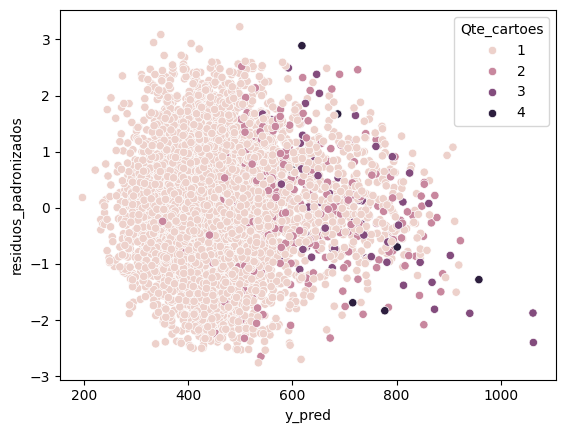

In [ ]:
sns.scatterplot(x='y_pred', y='residuos_padronizados', data=df_c_residuos_5, hue='Qte_cartoes')
plt.show()

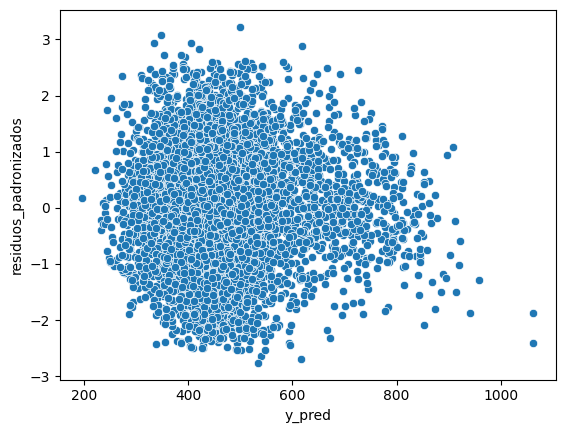

In [ ]:
sns.scatterplot(x='y_pred', y='residuos_padronizados', data=df_c_residuos_5)
plt.show()

<ipython-input-207-168b3165e07c>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,1)


Text(0.5, 0, '')

<Figure size 1000x1000 with 0 Axes>

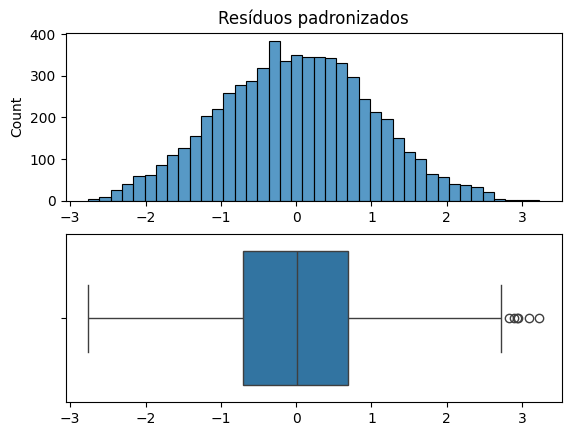

In [ ]:
plt.figure(figsize=(10,10))
fig, ax = plt.subplots()

plt.subplot(2,1,1)
sns.histplot(x=df_c_residuos_5['residuos_padronizados'])
plt.title('Resíduos padronizados')
plt.xlabel('')

plt.subplot(2,1,2)
sns.boxplot(x=df_c_residuos_5['residuos_padronizados'])
plt.xlabel('')

<ipython-input-208-f02bbd29cfb9>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuos5,ax=ax[0][1])


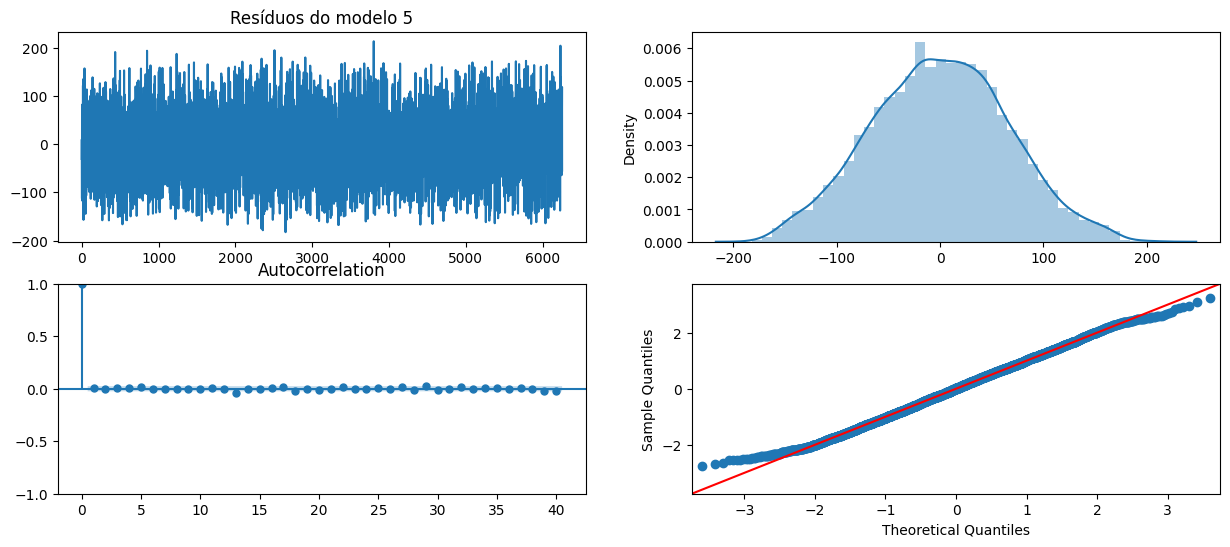

In [ ]:
residuos5 = results_5.resid
fig, ax = plt.subplots(2,2,figsize=(15,6))
residuos5.plot(title="Resíduos do modelo 5", ax=ax[0][0])
sns.distplot(residuos5,ax=ax[0][1])
plot_acf(residuos5,lags=40, ax=ax[1][0])
qqplot(residuos5, stats.norm, fit=True, line="45", ax=ax[1][1]);

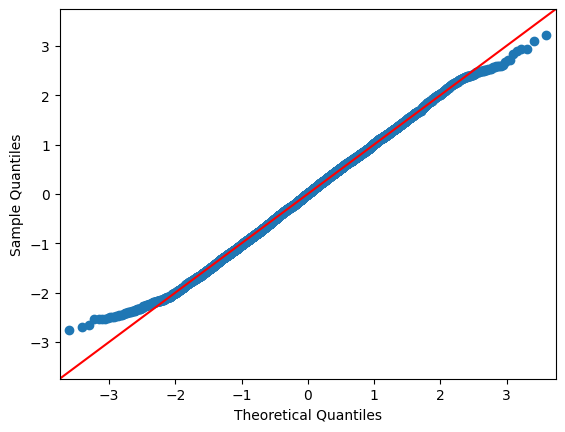

In [ ]:
qqplot(residuos5, stats.norm, fit=True, line="45");

#####Desempenho

######Dados treinamento

In [ ]:
rmse5  = (np.sqrt(mean_squared_error(df_c_residuos_5['y_true'], df_c_residuos_5['y_pred']))).round(2)
rmse5

66.1

In [ ]:
y_train_semout = df_c_residuos_5['y_true']
y_train_pred2 = df_c_residuos_5['y_pred']

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
me1   = round((y_train_semout-y_train_pred2).mean(),2)
mae1  = (mean_absolute_error(y_train_semout, y_train_pred2)).round(2)
mse1  = (mean_squared_error(y_train_semout, y_train_pred2)).round(2)
rmse1  = (np.sqrt(mean_squared_error(y_train_semout, y_train_pred2))).round(2)
mpe1  = round(((y_train_semout - y_train_pred2)/y_train_pred2).mean(),2)
mape1  =  round((mae1/y_train_semout).mean(),2)

In [ ]:
print(f'ME1: {me1}')
print(f'MAE1: {mae1}')
print(f'MSE1: {mse1}')
print(f'RMSE1: {rmse1}')
print(f'MPE1: {mpe1}')
print(f'MAPE1: {mape1}')

ME1: 0.0
MAE1: 53.47
MSE1: 4369.76
RMSE1: 66.1
MPE1: -0.0
MAPE1: 0.12


######Dados teste

Transformando dados teste

In [ ]:
X_test

tempo_ultimoservico  vl_salario_mil  vl_imovel_em_mil  Qte_cartoes  \
4064                 27.0       98.518213             459.0            1   
3375                 34.0       98.877219             378.0            1   
6153                 29.0       68.418401               0.0            1   
6914                 42.0       23.226154               0.0            1   
5304                 34.0       21.862883               0.0            1   
...                   ...             ...               ...          ...   
1988                 39.0       98.463596             200.0            1   
3666                 39.0      131.722849               0.0            1   
4209                 42.0      104.118948               0.0            1   
630                  33.0       69.055393               0.0            1   
7566                 38.0      129.734092               0.0            1   

      Qte_carros casa_propria  
4064           1            1  
3375           1            1  
6153           0            0  
6914           1            0  
5304           0            0  
...          ...          ...  
1988           1            1  
3666           1            0  
4209           2            0  
630            1            0  
7566           1            0  

[2814 rows x 6 columns]

In [ ]:
X_test_transformed_modelo_5 = X_test.copy().drop(columns=['casa_propria'])

In [ ]:
X_test_transformed_modelo_5['fx_vl_imovel'] = pd.cut(X_test['vl_imovel_em_mil'], bins=K, labels=False)
X_test_transformed_modelo_5.drop(columns=['vl_imovel_em_mil'], inplace=True)

In [ ]:
X_test_transformed_modelo_5

tempo_ultimoservico  vl_salario_mil  Qte_cartoes  Qte_carros  \
4064                 27.0       98.518213            1           1   
3375                 34.0       98.877219            1           1   
6153                 29.0       68.418401            1           0   
6914                 42.0       23.226154            1           1   
5304                 34.0       21.862883            1           0   
...                   ...             ...          ...         ...   
1988                 39.0       98.463596            1           1   
3666                 39.0      131.722849            1           1   
4209                 42.0      104.118948            1           2   
630                  33.0       69.055393            1           1   
7566                 38.0      129.734092            1           1   

      fx_vl_imovel  
4064             3  
3375             3  
6153             0  
6914             0  
5304             0  
...            ...  
1988             1  
3666             0  
4209             0  
630              0  
7566             0  

[2814 rows x 5 columns]

In [ ]:
#Instanciar OneHotEncoder
#encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

#chamar make_columns_transformer
#transformer_3 = make_column_transformer(
#    (encoder, ['Qte_cartoes', 'Qte_carros', 'fx_vl_imovel']),
#     remainder='passthrough',
#     sparse_threshold=0
#)

X_test_transformed_modelo_5 = transformer_3.transform(X_test_transformed_modelo_5)


X_test_transformed_modelo_5 = pd.DataFrame(X_test_transformed_modelo_5, columns=transformer_3.get_feature_names_out())
X_test_transformed_modelo_5

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


onehotencoder__Qte_cartoes_2  onehotencoder__Qte_cartoes_3  \
0                              0.0                           0.0   
1                              0.0                           0.0   
2                              0.0                           0.0   
3                              0.0                           0.0   
4                              0.0                           0.0   
...                            ...                           ...   
2809                           0.0                           0.0   
2810                           0.0                           0.0   
2811                           0.0                           0.0   
2812                           0.0                           0.0   
2813                           0.0                           0.0   

      onehotencoder__Qte_cartoes_4  onehotencoder__Qte_carros_1  \
0                              0.0                          1.0   
1                              0.0                          1.0   
2                              0.0                          0.0   
3                              0.0                          1.0   
4                              0.0                          0.0   
...                            ...                          ...   
2809                           0.0                          1.0   
2810                           0.0                          1.0   
2811                           0.0                          0.0   
2812                           0.0                          1.0   
2813                           0.0                          1.0   

      onehotencoder__Qte_carros_2  onehotencoder__fx_vl_imovel_1  \
0                             0.0                            0.0   
1                             0.0                            0.0   
2                             0.0                            0.0   
3                             0.0                            0.0   
4                             0.0                            0.0   
...                           ...                            ...   
2809                          0.0                            1.0   
2810                          0.0                            0.0   
2811                          1.0                            0.0   
2812                          0.0                            0.0   
2813                          0.0                            0.0   

      onehotencoder__fx_vl_imovel_2  onehotencoder__fx_vl_imovel_3  \
0                               0.0                            1.0   
1                               0.0                            1.0   
2                               0.0                            0.0   
3                               0.0                            0.0   
4                               0.0                            0.0   
...                             ...                            ...   
2809                            0.0                            0.0   
2810                            0.0                            0.0   
2811                            0.0                            0.0   
2812                            0.0                            0.0   
2813                            0.0                            0.0   

      onehotencoder__fx_vl_imovel_4  onehotencoder__fx_vl_imovel_5  \
0                               0.0                            0.0   
1                               0.0                            0.0   
2                               0.0                            0.0   
3                               0.0                            0.0   
4                               0.0                            0.0   
...                             ...                            ...   
2809                            0.0                            0.0   
2810                            0.0                            0.0   
2811                            0.0                            0.0   
2812                      

In [ ]:
X_test_model_5 = scaler.fit_transform(X_test_transformed_modelo_5)
X_test_model_5 = pd.DataFrame(X_test_model_5, columns=X_test_transformed_modelo_5.columns)
X_test_model_5

onehotencoder__Qte_cartoes_2  onehotencoder__Qte_cartoes_3  \
0                              0.0                           0.0   
1                              0.0                           0.0   
2                              0.0                           0.0   
3                              0.0                           0.0   
4                              0.0                           0.0   
...                            ...                           ...   
2809                           0.0                           0.0   
2810                           0.0                           0.0   
2811                           0.0                           0.0   
2812                           0.0                           0.0   
2813                           0.0                           0.0   

      onehotencoder__Qte_cartoes_4  onehotencoder__Qte_carros_1  \
0                              0.0                          1.0   
1                              0.0                          1.0   
2                              0.0                          0.0   
3                              0.0                          1.0   
4                              0.0                          0.0   
...                            ...                          ...   
2809                           0.0                          1.0   
2810                           0.0                          1.0   
2811                           0.0                          0.0   
2812                           0.0                          1.0   
2813                           0.0                          1.0   

      onehotencoder__Qte_carros_2  onehotencoder__fx_vl_imovel_1  \
0                             0.0                            0.0   
1                             0.0                            0.0   
2                             0.0                            0.0   
3                             0.0                            0.0   
4                             0.0                            0.0   
...                           ...                            ...   
2809                          0.0                            1.0   
2810                          0.0                            0.0   
2811                          1.0                            0.0   
2812                          0.0                            0.0   
2813                          0.0                            0.0   

      onehotencoder__fx_vl_imovel_2  onehotencoder__fx_vl_imovel_3  \
0                               0.0                            1.0   
1                               0.0                            1.0   
2                               0.0                            0.0   
3                               0.0                            0.0   
4                               0.0                            0.0   
...                             ...                            ...   
2809                            0.0                            0.0   
2810                            0.0                            0.0   
2811                            0.0                            0.0   
2812                            0.0                            0.0   
2813                            0.0                            0.0   

      onehotencoder__fx_vl_imovel_4  onehotencoder__fx_vl_imovel_5  \
0                               0.0                            0.0   
1                               0.0                            0.0   
2                               0.0                            0.0   
3                               0.0                            0.0   
4                               0.0                            0.0   
...                             ...                            ...   
2809                            0.0                            0.0   
2810                            0.0                            0.0   
2811                            0.0                            0.0   
2812                      

In [ ]:
y_test

4064    447.0
3375    475.0
6153    481.0
6914    480.6
5304    416.7
        ...  
1988    449.0
3666    474.3
4209    595.0
630     507.0
7566    473.0
Name: SCORE_CREDITO, Length: 2814, dtype: float64

In [ ]:
X_test_model_5 = sm.add_constant(X_test_model_5)

In [ ]:
y_pred_test = results_5.predict(X_test_model_5)

In [ ]:
y_test_model_5 = y_test.copy()

In [ ]:
me2   = round((y_test_model_5-y_pred_test).mean(),2)
mae2  = (mean_absolute_error(y_test_model_5, y_pred_test)).round(2)
mse2  = (mean_squared_error(y_test_model_5, y_pred_test)).round(2)
rmse2  = (np.sqrt(mean_squared_error(y_test_model_5, y_pred_test))).round(2)
mpe2  = round(((y_test_model_5 - y_pred_test)/y_test_model_5).mean(),2)
mape2  =  round((mae2/y_test_model_5).mean(),2)

In [ ]:
print(f'ME2: {me2}')
print(f'MAE2: {mae2}')
print(f'MSE2: {mse2}')
print(f'RMSE2: {rmse2}')
print(f'MPE2: {mpe2}')
print(f'MAPE2: {mape2}')

ME2: 3.23
MAE2: 60.6
MSE2: 6459.44
RMSE2: 80.37
MPE2: -0.08
MAPE2: 0.14


In [ ]:
# Comparcao dos erros entre as amostras
list1 = [me1, mae1,mse1,rmse1,mpe1, mape1]
list2 = [me2, mae2,mse2,rmse2,mpe2, mape2]
pd.DataFrame({"treino":list1, "teste": list2})

treino    teste
0     0.00     3.23
1    53.47    60.60
2  4369.76  6459.44
3    66.10    80.37
4    -0.00    -0.08
5     0.12     0.14